<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/workbook_09_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loss function derivation

##Least squares regression derivation with MLE

In the lecture we assumed that in order to find the best line we should minimize sum of least squares $SSE(fit)$.
Can we derive it?

Suppose that $x$ are not random variables and only $y$ is. This property is called **weak exogeneity**.
In other words In other words weak exogeneity means that the predictor variables are assumed to be error-free—that is, not contaminated with measurement errors. 

Let's assume **linearity** of $y$ with respect to $x$:

$$
y=a+bx+\epsilon \\
\epsilon \sim \mathcal{N}(0,\,\sigma^{2})
$$

it means that

$$
p(\epsilon)=\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{\epsilon^2}{2\sigma^2}}.
$$



In [ ]:
#@title ##Normal distribution
%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="111.16mm" height="98.824mm" version="1.1" viewBox="0 0 111.16 98.824" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker1218" overflow="visible" orient="auto">
   <path transform="matrix(-.2 0 0 -.2 -1.2 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".24155" fill-rule="evenodd" stroke="#000" stroke-opacity=".24155" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Send" overflow="visible" orient="auto">
   <path transform="matrix(-.2 0 0 -.2 -1.2 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".24155" fill-rule="evenodd" stroke="#000" stroke-opacity=".24155" stroke-width="1pt"/>
  </marker>
  <marker id="marker1203" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".81" fill-rule="evenodd" stroke="#000" stroke-opacity=".81" stroke-width="1pt"/>
  </marker>
  <marker id="marker1175" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".81" fill-rule="evenodd" stroke="#000" stroke-opacity=".81" stroke-width="1pt"/>
  </marker>
 </defs>
 <path d="m37.35 59.455-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z" fill="#0045b1" fill-opacity=".16288" fill-rule="evenodd"/>
 <g transform="translate(-48.948 -105.67)">
  <g fill="#0045b1" fill-opacity=".16288" fill-rule="evenodd">
   <path d="m145.07 131.33-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
   <path d="m114.62 148.68-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
   <path d="m98.836 156.8-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
   <path d="m136.03 135.35-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
  </g>
  <g fill="none" stroke="#000">
   <path d="m112.31 147.65h15.589" marker-end="url(#marker1218)" stroke-opacity=".24155" stroke-width=".44979"/>
   <path d="m48.948 197.97h109.86" marker-end="url(#marker1175)" stroke="#000" stroke-opacity=".81" stroke-width=".34396"/>
   <path d="m54.294 204.49v-98.146" marker-end="url(#marker1203)" stroke="#000" stroke-opacity=".81" stroke-width=".34396"/>
  </g>
  <g fill="#f00" fill-opacity=".63285">
   <circle cx="136.07" cy="140.52" r="1.2373"/>
   <circle cx="145.14" cy="121.9" r="1.2373"/>
   <circle cx="86.195" cy="164.22" r="1.2373"/>
   <circle cx="98.884" cy="154.63" r="1.2373"/>
  </g>
  <path d="m114.62 118.78v82.09" fill="none" marker-end="url(#Arrow1Send)" stroke="#000" stroke-opacity=".24155" stroke-width=".44979"/>
  <circle cx="114.62" cy="146" r="1.2373" fill="#f00" fill-opacity=".63285"/>
  <g id="content" transform="matrix(1.5,0,0,-1.5,-346.77,1112.4)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$x y \\text{Laplace}(0,\\alpha)$$\n" xml:space="preserve"><path d="m337.04 607.78 5e-3 0.0136v0.0137l0.01 0.0273 0.01 0.0365 9e-3 0.0229 5e-3 0.0183 9e-3 0.0229 5e-3 0.0229 9e-3 0.0183 9e-3 0.0229 0.0136 0.0229 9e-3 0.0229 0.0136 0.0229 9e-3 0.0229 0.0273 0.0456 0.0183 0.0183 0.0136 0.0228 0.0548 0.0548 0.0229 0.0183 0.0183 0.0136 0.0229 0.0136 0.0136 5e-3 9e-3 5e-3 0.0273 0.01 9e-3 5e-3 0.0273 0.01h0.0136l0.0137 5e-3h0.0455c0.0229 0 0.12778 0 0.22817-0.0593-0.13233-0.0229-0.21903-0.13689-0.21903-0.24186 0-0.073 0.0502-0.15971 0.17341-0.15971 0.0958 0 0.24185 0.0821 0.24185 0.26468 0 0.23273-0.26924 0.29662-0.41983 0.29662-0.26468 0-0.42439-0.24186-0.47915-0.34226-0.11409 0.29662-0.36052 0.34226-0.49285 0.34226-0.4746 0-0.73014-0.58412-0.73014-0.6982 0-0.0456 0.0456-0.0456 0.0548-0.0456 0.0365 0 0.0503 9e-3 0.0593 0.0502 0.15516 0.47916 0.45178 0.59324 0.60693 0.59324 0.0868 0 0.24643-0.041 0.24643-0.30118 0-0.14147-0.0775-0.44722-0.24643-1.0816-0.073-0.27836-0.23273-0.47004-0.43352-0.47004-0.0229 0-0.13233 0-0.22361 0.0593 0.10952 0.0228 0.20993 0.11865 0.20993 0.24643 0 0.11865-0.10041 0.15515-0.16428 0.15515-0.13691 0-0.251-0.11865-0.251-0.26012 0-0.2099 0.22817-0.30118 0.42439-0.30118 0.3012 0 0.46547 0.31944 0.47917 0.34682 0.0548-0.16885 0.21904-0.34682 0.49285-0.34682 0.47001 0 0.72557 0.58412 0.72557 0.69821 0 0.0456-0.041 0.0456-0.0548 0.0456-0.0411 0-0.0456-0.0183-0.0593-0.0502-0.14601-0.48371-0.45633-0.59325-0.60236-0.59325-0.17797 0-0.25098 0.14603-0.25098 0.29662 0 0.1004 0.0274 0.20079 0.0775 0.40158z"/><path d="m266.16 670.44v5e-3l5e-3 5e-3v0.0148l5e-3 5e-3v0.0148l5e-3 5e-3v0.0245h5e-3v0.0344c0 0.0821-0.0639 0.12321-0.13234 0.12321-0.0456 0-0.11864-0.0274-0.15971-0.0958-9e-3 -0.0228-0.0456-0.15972-0.0639-0.24187-0.032-0.11864-0.0639-0.24186-0.0913-0.36506l-0.20535-0.81685c-0.0182-0.0685-0.2145-0.38333-0.5111-0.38333-0.23273 0-0.28294 0.20079-0.28294 0.36507 0 0.20992 0.0775 0.49285 0.22817 0.88987 0.0731 0.18708 0.0958 0.23729 0.0958 0.32856 0 0.20079-0.14603 0.36964-0.37419 0.36964-0.43353 0-0.60237-0.65714-0.60237-0.6982 0-0.0456 0.0456-0.0456 0.0548-0.0456 0.0456 0 0.0502 9e-3 0.073 0.0821 0.12321 0.4244 0.30575 0.56129 0.4609 0.56129 0.0365 0 0.11409 0 0.11409-0.14603 0-0.10951-0.0456-0.22816-0.0775-0.31487-0.18254-0.47916-0.26468-0.73927-0.26468-0.95376 0-0.40157 0.2875-0.53847 0.55216-0.53847 0.17797 0 0.33314 0.0775 0.46091 0.20534-0.0593-0.23729-0.11409-0.46089-0.29661-0.69819-0.11409-0.15516-0.2875-0.2875-0.49742-0.2875-0.0639 0-0.26924 0.0136-0.34682 0.19166 0.073 0 0.13234 0 0.19622 0.0548 0.0456 0.041 0.0913 0.10041 0.0913 0.18712 0 0.13689-0.12322 0.15516-0.16884 0.15516-0.10497 0-0.25556-0.073-0.25556-0.29207 0-0.22816 0.2008-0.39701 0.48371-0.39701 0.46548 0 0.93552 0.41526 1.0633 0.92635z"/></g>
  <g fill="none">
   <path d="m59.902 179.25 98.667-56.892" stroke="#006be0" stroke-width=".765"/>
  </g>
  <g transform="matrix(.51106 0 0 -.51106 -27.022 513)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\mathcal{N}(0,\\sigma^2)$$\n" xml:space="preserve"><path d="m287.02 698.93 0.0672-0.22388 0.0448-0.12314 0.0448-0.13433 0.0448-0.14553 0.0224-0.0672 0.0224-0.0784 0.0336-0.0784 0.0448-0.15672 0.0336-0.0896 0.0224-0.0784 0.0672-0.1791 0.0224-0.10075 0.0336-0.0896 0.0672-0.20149 0.0448-0.10075 0.0336-0.11195 0.0336-0.10074 0.0895-0.22389 0.0336-0.12314 0.13433-0.36941c0.70524-1.8918 1.0187-2.5859 1.7015-3.6381 0.15672-0.23508 0.16791-0.24628 0.26866-0.24628 0.15672 0 0.3918 0.13433 0.51494 0.22389 0.15672 0.14552 0.16791 0.15672 0.29105 0.70524 0.66046 2.9217 1.5112 5.9665 1.7351 6.4815 0.0112 0.0224 0.23508 0.43657 1.612 0.47016 0.22389 0.0112 0.43658 0.59329 0.43658 0.83957 0 0.17911-0.0672 0.17911-0.22389 0.17911-1.1194 0-1.6232-0.47016-1.7575-0.61569-0.31344-0.3918-0.5821-1.209-1.097-3.0672-0.38061-1.4217-0.73883-2.8657-1.0858-4.2986-0.61568 0.91793-0.96271 1.7911-1.5 3.2352-0.5933 1.5784-0.95151 2.7314-1.2538 3.7389-0.0672 0.21269-0.0784 0.22389-0.17911 0.22389-0.0224 0-0.23508 0-0.55971-0.26867-0.11194-0.0896-0.12314-0.1903-0.13433-0.31344-0.31344-2.9665-1.3657-5.8882-1.668-6.4255-0.0895-0.15672-0.22388-0.35821-0.44777-0.35821-0.11194 0-0.54852 0.056-0.83957 0.32463-0.056 0.0336-0.0784 0.0336-0.0896 0.0336-0.17911 0-0.41419-0.54851-0.41419-0.81718 0-0.34702 0.68285-0.5709 0.99629-0.5709 0.71643 0 1.2873 1.5672 1.4664 2.0821 0.72763 2.015 1.0746 3.6717 1.2873 4.8583z"/><path d="m297.08 689.93v0.0224h-0.0112v0.0224h-0.0112v0.0112l-0.0112 0.0112v0.0112h-0.0112v0.0112h-0.0112v0.0112l-0.0112 0.0112h-0.0112v0.0112l-0.11194 0.11194c-1.3993 1.4105-1.7575 3.5038-1.7575 5.2053 0 1.9366 0.42538 3.8732 1.8023 5.2613 0.14552 0.13433 0.14552 0.15672 0.14552 0.19031 0 0.0784-0.0448 0.11194-0.11194 0.11194-0.11194 0-1.1194-0.75002-1.7799-2.1717-0.57091-1.2202-0.70524-2.4515-0.70524-3.3919 0-0.86196 0.12314-2.2053 0.73882-3.4702 0.67166-1.3657 1.6344-2.0821 1.7463-2.0821 0.0672 0 0.11194 0.0336 0.11194 0.11194z"/><path d="m302.17 696.15v0.33582l-0.0112 0.16792-0.0112 0.15672v0.16791l-0.0224 0.16792-0.0112 0.16791-0.0224 0.15672-0.0224 0.16791-0.0336 0.15672-0.0336 0.16792-0.0895 0.31344-0.056 0.15672-0.13433 0.31344c-0.51493 1.0746-1.4329 1.2538-1.903 1.2538-0.66046 0-1.4776-0.29105-1.9366-1.3321-0.35822-0.76121-0.41419-1.6344-0.41419-2.5187 0-0.83957 0.0448-1.8359 0.50374-2.6754 0.48136-0.90674 1.2985-1.1306 1.8359-1.1306v0.24628c-0.42538 0-1.0858 0.27986-1.2873 1.3433-0.12313 0.67166-0.12313 1.6903-0.12313 2.3508 0 0.70524 0 1.4441 0.0896 2.0486 0.21269 1.3209 1.0411 1.4217 1.3209 1.4217 0.36941 0 1.1082-0.2015 1.3209-1.2985 0.11194-0.62688 0.11194-1.4776 0.11194-2.1717 0-0.83957 0-1.5896-0.12314-2.306-0.16791-1.0523-0.80598-1.3881-1.3097-1.3881v-0.24628c0.60449 0 1.4553 0.23508 1.9478 1.2874 0.35821 0.7724 0.41418 1.6344 0.41418 2.5187z"/><path d="m304.87 692.6v0.0672l-0.0112 0.0672v0.0672l-0.0112 0.056v0.0672l-0.0448 0.22388-0.0112 0.0448-0.0224 0.056-0.0112 0.0448-0.0448 0.0896-0.0224 0.0336-0.0224 0.0448-0.0672 0.10075-0.056 0.056-0.13433 0.0896-0.0336 0.0112-0.0336 0.0224-0.0336 0.0112h-0.0448l-0.0336 0.0112h-0.0784c-0.36941 0-0.59329-0.27986-0.59329-0.58211 0-0.30224 0.22388-0.59329 0.59329-0.59329 0.13434 0 0.27986 0.0448 0.3918 0.14552 0.0336 0.0224 0.0448 0.0336 0.056 0.0336s0.0224-0.0112 0.0224-0.16792c0-0.81718-0.3918-1.4888-0.76121-1.8582-0.12313-0.12313-0.12313-0.14552-0.12313-0.1791 0-0.0784 0.056-0.12314 0.11194-0.12314 0.12314 0 1.0187 0.86196 1.0187 2.1605z"/><path d="m313.35 696.74h0.16791l0.0224 0.0112h0.0448l0.0224 0.0112h0.0224l0.13434 0.0672 0.0112 0.0112 0.0224 0.0112 0.0112 0.0112v0.0112l0.0336 0.0336v0.0112l0.0112 0.0112v0.0112l0.0112 0.0112v0.0112l0.0112 0.0112v0.0224l0.0112 0.0224v0.0448l0.0112 0.0112v0.0336c0 0.26867-0.23508 0.26867-0.43658 0.26867h-2.5411c-1.6903 0-2.9329-1.8359-2.9329-3.1568 0-0.9739 0.66047-1.7575 1.6791-1.7575l0.0112 0.24628c-0.54852 0-0.99629 0.40299-0.99629 1.1978 0 0.33583 0.13433 1.2538 0.52613 1.903 0.47016 0.7724 1.1418 0.92912 1.5112 0.92912 0.94031 0 1.0299-0.73882 1.0299-1.0858 0-0.51494-0.22389-1.4329-0.60449-2.0038-0.43658-0.64926-1.0299-0.94031-1.4664-0.94031l-0.0112-0.24628c1.3209 0 2.7986 1.3433 2.7986 3.056 0 0.1903 0 0.72762-0.34702 1.2202z"/><path d="m318.28 698.61h-0.26866c-0.0224-0.16792-0.10075-0.63808-0.2015-0.70524-0.0672-0.056-0.66046-0.056-0.7724-0.056h-1.4441c0.82837 0.72763 1.097 0.95152 1.5672 1.3097 0.58211 0.45897 1.1194 0.94032 1.1194 1.6791 0 0.95152-0.82838 1.5224-1.8359 1.5224-0.96271 0-1.6232-0.68286-1.6232-1.3881 0-0.403 0.33583-0.43658 0.41419-0.43658 0.1903 0 0.41419 0.12314 0.41419 0.41419 0 0.13433-0.056 0.40299-0.45897 0.40299 0.24628 0.55971 0.77241 0.72763 1.1418 0.72763 0.7836 0 1.1866-0.60449 1.1866-1.2426 0-0.67165-0.48135-1.209-0.72763-1.4888l-1.8918-1.8582c-0.0784-0.0672-0.0784-0.0784-0.0784-0.30225h3.224z"/><path d="m321.85 695.37v0.34702l-0.0112 0.1903-0.0112 0.2015-0.0224 0.2015-0.0224 0.21269-0.0336 0.21269-0.0336 0.22388-0.0448 0.23508-0.056 0.22389-0.056 0.23508-0.0672 0.23508-0.0784 0.24627-0.0896 0.23508-0.0448 0.12314-0.056 0.11194-0.056 0.12314-0.056 0.11194c-0.67166 1.3657-1.6232 2.0933-1.7351 2.0933-0.0672 0-0.11194-0.0448-0.11194-0.11194 0-0.0336 0-0.056 0.21269-0.25747 1.0858-1.097 1.7239-2.8657 1.7239-5.1941 0-1.8918-0.41418-3.8508-1.7911-5.2501-0.14552-0.13434-0.14552-0.15672-0.14552-0.19031 0-0.0672 0.0448-0.11194 0.11194-0.11194 0.11194 0 1.1082 0.75002 1.7687 2.1605 0.57091 1.2314 0.70524 2.4627 0.70524 3.3919z"/></g>
 </g>
</svg>



Note that $\sigma$ is constant for all $x$. This is the property of **constant variance** (a.k.a. homoscedasticity).
Suppose also that errors $\epsilon$ are **independent** random variables (iid).

$$
\begin{aligned}
L(a,b|\mathbf{y})&=P(\mathbf{y}|a,b)=\prod_i P(y_i|a,b)=\prod_i p(y_i-a-bx|a,b)=\prod_i \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(y_i-a-bx)^2}{2\sigma^2}}=\frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{\sum_i (y_i-a-bx)^2}{2 \sigma^2}}.
\end{aligned}
$$

Now we calculate log-likelihood function 

$$
l(a,b|\mathbf{y})=\log{L(a,b|\mathbf{y})}=.... 
$$

And calculate $a$ and $b$ that minimize it

$$
(\hat{a},\hat{b})=\text{argmax}_{a,b} \, l(a,b|\mathbf{y}) = \text{argmin}_{a,b} \, E(a,b) = \cdots 
$$

Continue calculation to show that MLE lead to minimization of $E(a,b)=SSE(a,b)$.

By this example we have learned that OLS is applicable under following assumptions:
* weak exogeneity
* linearity
* constant variance
* independence
* lack of perfect multicollinearity (in multivariate regression independent variables should not have a linear relation between each other)

In [ ]:
#@title #Linear regression for a point cloud with adjustable parameters

%%html

<html>

<head>
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script> 
  <script src='https://www.gstatic.com/external_hosted/mathjax/latest/MathJax.js?config=default'></script>

  <script type="application/javascript">

    function mean(idx) {
      var sum = 0.0;
      var num = 0;
      if (active_pt && active_pt[0] > 0 && active_pt[0] < 600 && active_pt[1] > 0 && active_pt[1] < 600) {
        sum = active_pt[idx];
        num = 1;
      }
      all_pts.forEach(function (item, index) {
          sum += item[idx];
          num += 1;
        });
      return sum / num;
    }

    function coef(m_x, m_y) {
      cov_xy = 0.0;
      s_x2 = 0.0;
      s_y2 = 0.0;
      all_pts.forEach(function (item, index) {
          dx = item[0] - m_x;
          dy = item[1] - m_y;
          cov_xy += dx * dy;
          s_x2 += dx * dx;
          s_y2 += dy * dy;
        });
      cov_xy /= all_pts.length;
      s_x2 /= all_pts.length;
      s_y2 /= all_pts.length;
      return [s_x2, cov_xy];
    }


   function gaussian(x, mu, sigma) {
   	 return Math.exp(-(x - mu)*(x - mu)/sigma/sigma/2)/sigma/Math.sqrt(2 * Math.PI);
   }
   function random_point(mu, sigma) {
   	 var z = Math.sqrt(-2.0 * Math.log(Math.random())) * Math.cos(2.0 * Math.PI * Math.random());
   	 return z * sigma + mu;
   }

    var active_pt = null;
    var all_pts = [];
    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function regenerate() {
      var elem = document.getElementById("samples_val");
      var samples = parseInt(elem.value);
      var pos = all_pts[0];
      all_pts = [pos];
      var vx = [pos[3] - pos[0], pos[4] - pos[1]];
      var vy = [pos[5] - pos[0], pos[6] - pos[1]];
      var rx = Math.sqrt(vx[0]*vx[0] + vx[1]*vx[1]);
      var ry = Math.sqrt(vy[0]*vy[0] + vy[1]*vy[1]);
      vx = [vx[0]/rx, vx[1]/rx];
      vy = [vy[0]/ry, vy[1]/ry];
      for (var i = 0; i < samples; ++i) {
        var gaus_x = random_point(0, rx/2.0);
        var gaus_y = random_point(0, ry/2.0);
        all_pts.push([vx[0]*gaus_x + vy[0]*gaus_y + pos[0], vx[1]*gaus_x + vy[1]*gaus_y + pos[1], 0]);
      }
    }


    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos) {
      ctx.beginPath();
      if (pos[2] == 0) {
      	  ctx.fillStyle = 'rgba(128, 128, 128, 0.5)';
          ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
          ctx.fill();
      } else {
      	  ctx.fillStyle = 'rgba(0, 89, 208, 0.4)';
          ctx.fillRect(pos[0] - ptR, pos[1] - ptR, 2 * ptR, 2 * ptR);
          ctx.fillStyle = 'rgba(128, 0, 0, 1.0)';
          ctx.fillRect(pos[3] - ptR/2, pos[4] - ptR/2, ptR, ptR);
          ctx.fillRect(pos[5] - ptR/2, pos[6] - ptR/2, ptR, ptR);
          ctx.fillStyle = 'rgba(128, 0, 0, 0.1)';
          var rx = Math.sqrt((pos[4] - pos[1])*(pos[4] - pos[1]) + (pos[3] - pos[0])*(pos[3] - pos[0]));
          var ry = Math.sqrt((pos[6] - pos[1])*(pos[6] - pos[1]) + (pos[5] - pos[0])*(pos[5] - pos[0]));
          ctx.ellipse(pos[0], pos[1], rx, ry, Math.atan2(pos[4] - pos[1], pos[3] - pos[0]), 0, Math.PI * 2.0);
          ctx.fill();
      }
    }
    
    
    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeStyle = 'black';
        ctx.lineWidth = 2.0;
        ctx.strokeRect(0, 0, 600, 600); // field
        
        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText(debug_txt, 200, 200);
        
        if (active_pt) {
          circ(ctx, active_pt);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, item);

        });
        circ(ctx, all_pts[0]);

        if (!active_pt) {
          var temp = all_pts.shift();
          var m_x = mean(0);
          var m_y = mean(1);
          var corr = coef(m_x, m_y);
          //ctx.fillStyle = 'black';
          //ctx.fillText('Coef: ' + corr.toFixed(5), 20, 30);
          all_pts.unshift(temp);

          if (corr && corr[0] && corr[1]) {
            //ctx.fillStyle = 'black';
            //ctx.fillText('Coef: ' + corr[0].toFixed(5) + '    ' + corr[1].toFixed(5), 20, 30);
            ctx.strokeStyle = 'blue';
            ctx.beginPath();
            ctx.moveTo(m_x - 100.0 * corr[0], m_y - 100.0 * corr[1]);
            ctx.lineTo(m_x + 100.0 * corr[0], m_y + 100.0 * corr[1]);
            ctx.stroke();          
          }

        }


      }
    }
    
    var timer

    function mdown_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      idx = -1;
      var item = all_pts[0];
      var index = 0;
      //all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        if (item[2] == 1)
          	item[7] = 0;
        }
        if (item[2] == 1 && is_close([x,y], [item[3], item[4]])) {
        	item[7] = 1;
        	idx = index;
        }
        if (item[2] == 1 && is_close([x,y], [item[5], item[6]])) {
        	item[7] = 2;
        	idx = index;
        }
      //});
      if (idx <= -1)
          return;

    active_pt = all_pts[idx];
    all_pts.splice(idx, 1);
    }
    
    function mmove_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
      	if (active_pt[2] == 0) {
      		active_pt[0] = x;
        	active_pt[1] = y;
      	}
        if (active_pt[2] == 1) {
        	if (active_pt[7] == 0) {
            	active_pt[3] += x - active_pt[0];
            	active_pt[4] += y - active_pt[1];
            	active_pt[5] += x - active_pt[0];
            	active_pt[6] += y - active_pt[1];
            	active_pt[0] = x;
        		active_pt[1] = y;
            }
            if (active_pt[7] == 1) {
            	active_pt[3] = x;
            	active_pt[4] = y;
            	var v_x = active_pt[3] - active_pt[0];
            	var v_y = active_pt[4] - active_pt[1];
            	var r = Math.sqrt(v_x*v_x + v_y*v_y);
            	var u_x = active_pt[5] - active_pt[0];
            	var u_y = active_pt[6] - active_pt[1];
            	var R = Math.sqrt(u_x*u_x + u_y*u_y);
            	active_pt[5] = active_pt[0] - v_y / r * R;
            	active_pt[6] = active_pt[1] + v_x / r * R;
            }
            if (active_pt[7] == 2) {
            	active_pt[5] = x;
            	active_pt[6] = y;
            	var v_x = active_pt[3] - active_pt[0];
            	var v_y = active_pt[4] - active_pt[1];
            	var r = Math.sqrt(v_x*v_x + v_y*v_y);
            	var u_x = active_pt[5] - active_pt[0];
            	var u_y = active_pt[6] - active_pt[1];
            	var R = Math.sqrt(u_x*u_x + u_y*u_y);
            	active_pt[3] = active_pt[0] + u_y / R * r;
            	active_pt[4] = active_pt[1] - u_x / R * r;

            }         
        }
                
      }
    }
    
    function mup_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        //all_pts.push(active_pt);
        all_pts = [active_pt];
        active_pt = null;
        regenerate();
      }
    }
    
    function clear_field() {
      active_pt = null;
      var x = 300;
      var y = 300;
      all_pts = [[x, y, 1, x + 20, y, x, y + 20, 0]];
    }


  	function calculate()
  	{
      var elem = document.getElementById("samples_val");
      var samples = elem.value;
      elem = document.getElementById("samples_label");
      elem.innerHTML = samples;    
      regenerate();  
  	}


  </script>
</head>

<body>

  <table>
    <tr>
      <td># of samples: </td>
      <td><input type="range" class="slider" min = "0" max = "100" value="0" id="samples_val" oninput="calculate();"></td>
      <td><div id="samples_label" >0</div></td>
    </tr>
  </table>

  <canvas id="canvas" width="600" height="600" 
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
</body>

<script>
function init()
{
  clear_field();
  calculate();
  timer = setInterval(draw, 10);
}

init();
</script>

</html>

# of samples:,,0


##Least absolute deviations (LAD) method

Suppose as before

$$
y=a+bx+\epsilon,
$$

but $\epsilon$ has *Laplace distribution* instead of *Normal distribution*

$$
\epsilon \sim \text{Laplace}(0, \alpha).
$$






###Solution

In [ ]:
#@title ##Laplace distribution
%%html
<?xml version="1.0" encoding="UTF-8"?>
<svg width="112.03mm" height="98.824mm" version="1.1" viewBox="0 0 112.03 98.824" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker1175-1" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-opacity=".81" stroke-width="1pt"/>
  </marker>
  <marker id="marker1203-8" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-opacity=".81" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Send-5" overflow="visible" orient="auto">
   <path transform="matrix(-.2 0 0 -.2 -1.2 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".24155" fill-rule="evenodd" stroke="#000" stroke-opacity=".24155" stroke-width="1pt"/>
  </marker>
  <marker id="marker1218-3" overflow="visible" orient="auto">
   <path transform="matrix(-.2 0 0 -.2 -1.2 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".16288" fill-rule="evenodd" stroke="#000" stroke-opacity=".20833" stroke-width="1pt"/>
  </marker>
 </defs>
 <path d="m65.672 43.663-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.34398 1.7421 0.65001 2.5869 0.28752 0.79377 0.84732 2.5587 1.9996 4.0826 1.6229 2.1463 3.3921 3.1615 5.0326 3.7398 1.1759 0.41456 3.2406 0.88305 4.1437 1.0598-0.93924 0.26382-2.6339 0.54259-4.1937 1.2053-1.4764 0.60234-3.1031 1.2948-4.6688 3.2913-1.7068 2.1764-2.2998 4.1898-2.6312 5.5261-0.45673 1.8418-0.31142 2.7177-0.41105 3.8008-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z" fill="#0045b1" fill-opacity=".16288" fill-rule="evenodd"/>
 <g stroke="#000">
  <path d="m0 92.303h109.86" marker-end="url(#marker1175-1)" stroke-opacity=".81" stroke-width=".34396"/>
  <path d="m5.3458 98.824v-98.146" marker-end="url(#marker1203-8)" stroke-opacity=".81" stroke-width=".34396"/>
  <path d="m65.672 13.114v82.09" fill="none" marker-end="url(#Arrow1Send-5)" stroke-opacity=".24155" stroke-width=".44979"/>
 </g>
 <circle cx="65.672" cy="40.334" r="1.2373" fill="#f00" fill-opacity=".63285"/>
 <path d="m109.85 95.069 7e-3 -0.0204v-0.0206l0.015-0.0409 0.015-0.0547 0.0135-0.0344 7e-3 -0.0275 0.0135-0.0344 7e-3 -0.0343 0.0135-0.0275 0.0135-0.0344 0.0204-0.0344 0.0135-0.0344 0.0204-0.0343 0.0135-0.0344 0.0409-0.0684 0.0275-0.0275 0.0204-0.0342 0.0822-0.0822 0.0343-0.0275 0.0275-0.0204 0.0344-0.0204 0.0204-7e-3 0.0135-8e-3 0.041-0.015 0.0135-7e-3 0.0409-0.015h0.0204l0.0206-8e-3h0.0683c0.0344 0 0.19167 0 0.34225 0.089-0.19849 0.0343-0.32854 0.20534-0.32854 0.36279 0 0.1095 0.0753 0.23957 0.26011 0.23957 0.1437 0 0.36278-0.12315 0.36278-0.39702 0-0.3491-0.40386-0.44493-0.62975-0.44493-0.39702 0-0.63658 0.36279-0.71872 0.51339-0.17114-0.44493-0.54078-0.51339-0.73928-0.51339-0.7119 0-1.0952 0.87618-1.0952 1.0473 0 0.0684 0.0684 0.0684 0.0822 0.0684 0.0547 0 0.0755-0.0135 0.089-0.0753 0.23274-0.71874 0.67767-0.88986 0.9104-0.88986 0.1302 0 0.36964 0.0615 0.36964 0.45177 0 0.2122-0.11625 0.67083-0.36964 1.6223-0.1095 0.41754-0.3491 0.70506-0.65028 0.70506-0.0343 0-0.1985 0-0.33542-0.0889 0.16428-0.0342 0.3149-0.17798 0.3149-0.36965 0-0.17797-0.15062-0.23272-0.24642-0.23272-0.20537 0-0.3765 0.17797-0.3765 0.39018 0 0.31485 0.34225 0.45177 0.63658 0.45177 0.4518 0 0.69821-0.47916 0.71876-0.52023 0.0822 0.25327 0.32856 0.52023 0.73927 0.52023 0.70502 0 1.0884-0.87618 1.0884-1.0473 0-0.0684-0.0615-0.0684-0.0822-0.0684-0.0617 0-0.0684 0.0275-0.089 0.0753-0.21902 0.72557-0.6845 0.88988-0.90354 0.88988-0.26696 0-0.37647-0.21905-0.37647-0.44493 0-0.1506 0.0411-0.30119 0.11625-0.60237z" stroke-width="0"/>
 <path d="m3.5226 1.0773v-0.0075l7e-3 -0.0075v-0.0222l7e-3 -0.0075v-0.0222l8e-3 -0.0075v-0.03675h7e-3v-0.0516c0-0.12315-0.0959-0.18482-0.19851-0.18482-0.0684 0-0.17796 0.0411-0.23956 0.1437-0.0135 0.0342-0.0684 0.23958-0.0958 0.3628-0.048 0.17796-0.0959 0.36279-0.13695 0.54759l-0.30803 1.2253c-0.0273 0.10275-0.32175 0.575-0.76665 0.575-0.34909 0-0.42441-0.30118-0.42441-0.5476 0-0.31488 0.11625-0.73928 0.34226-1.3348 0.10965-0.28062 0.1437-0.35593 0.1437-0.49284 0-0.30118-0.21905-0.55446-0.56129-0.55446-0.65029 0-0.90355 0.98571-0.90355 1.0473 0 0.0684 0.0684 0.0684 0.0822 0.0684 0.0684 0 0.0753-0.0135 0.1095-0.12315 0.18481-0.6366 0.45862-0.84193 0.69135-0.84193 0.0548 0 0.17113 0 0.17113 0.21904 0 0.16426-0.0684 0.34224-0.11625 0.4723-0.27381 0.71874-0.39702 1.1089-0.39702 1.4306 0 0.60236 0.43125 0.8077 0.82824 0.8077 0.26696 0 0.49971-0.11625 0.69137-0.30801-0.0889 0.35594-0.17114 0.69134-0.44492 1.0473-0.17113 0.23274-0.43125 0.43125-0.74613 0.43125-0.0959 0-0.40386-0.0204-0.52023-0.28749 0.1095 0 0.19851 0 0.29433-0.0822 0.0684-0.0615 0.13695-0.15062 0.13695-0.28068 0-0.20534-0.18483-0.23274-0.25326-0.23274-0.15745 0-0.38334 0.1095-0.38334 0.4381 0 0.34224 0.3012 0.59552 0.72557 0.59552 0.69822 0 1.4033-0.62289 1.595-1.3895z" stroke-width="0"/>
 <path d="m8.7089 69.276 103.16-48.275" stroke="#006be0" stroke-width=".765"/>
 <g fill="#f00" fill-opacity=".63285">
  <circle cx="49.892" cy="49.07" r="1.2373"/>
  <circle cx="37.328" cy="58.337" r="1.2373"/>
  <circle cx="96.219" cy="14.678" r="1.2373"/>
  <circle cx="87.122" cy="36.82" r="1.2373"/>
 </g>
 <g fill="#0045b1" fill-opacity=".16288" fill-rule="evenodd">
  <path d="m49.848 50.866-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.34398 1.7421 0.65001 2.5869 0.28752 0.79377 0.84732 2.5587 1.9996 4.0826 1.6229 2.1463 3.3921 3.1615 5.0326 3.7398 1.1759 0.41456 3.2406 0.88305 4.1437 1.0598-0.93924 0.26382-2.6339 0.54259-4.1937 1.2053-1.4764 0.60234-3.1031 1.2948-4.6688 3.2913-1.7068 2.1764-2.2998 4.1898-2.6312 5.5261-0.45673 1.8418-0.31142 2.7177-0.41105 3.8008-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
  <path d="m37.267 55.911-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.34398 1.7421 0.65001 2.5869 0.28752 0.79377 0.84732 2.5587 1.9996 4.0826 1.6229 2.1463 3.3921 3.1615 5.0326 3.7398 1.1759 0.41456 3.2406 0.88305 4.1437 1.0598-0.93924 0.26382-2.6339 0.54259-4.1937 1.2053-1.4764 0.60234-3.1031 1.2948-4.6688 3.2913-1.7068 2.1764-2.2998 4.1898-2.6312 5.5261-0.45673 1.8418-0.31142 2.7177-0.41105 3.8008-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
  <path d="m87.009 33.812-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.34398 1.7421 0.65001 2.5869 0.28752 0.79377 0.84732 2.5587 1.9996 4.0826 1.6229 2.1463 3.3921 3.1615 5.0326 3.7398 1.1759 0.41456 3.2406 0.88305 4.1437 1.0598-0.93924 0.26382-2.6339 0.54259-4.1937 1.2053-1.4764 0.60234-3.1031 1.2948-4.6688 3.2913-1.7068 2.1764-2.2998 4.1898-2.6312 5.5261-0.45673 1.8418-0.31142 2.7177-0.41105 3.8008-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
  <path d="m96.276 29.449-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.34398 1.7421 0.65001 2.5869 0.28752 0.79377 0.84732 2.5587 1.9996 4.0826 1.6229 2.1463 3.3921 3.1615 5.0326 3.7398 1.1759 0.41456 3.2406 0.88305 4.1437 1.0598-0.93924 0.26382-2.6339 0.54259-4.1937 1.2053-1.4764 0.60234-3.1031 1.2948-4.6688 3.2913-1.7068 2.1764-2.2998 4.1898-2.6312 5.5261-0.45673 1.8418-0.31142 2.7177-0.41105 3.8008-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
 </g>
 <path d="m63.499 42.599h15.589" fill-opacity=".16288" marker-end="url(#marker1218-3)" stroke="#000" stroke-opacity=".20833" stroke-width=".44979"/>
 <g transform="matrix(.56011 0 0 .56011 67.245 49.896)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$Laplace(0, \\alpha)$$" ns0:version="1.1.0">
  <defs></defs>
  <g id="id-086ff19f-1c3d-46ce-8d78-3b5f500f449c" transform="translate(-277.01 -139.24)">
   <g transform="translate(276.62 146.72)">
    <path d="m3.7344-6.0312c0.078125-0.35938 0.10938-0.46875 1.0469-0.46875 0.29688 0 0.375 0 0.375-0.1875 0-0.125-0.10938-0.125-0.15625-0.125-0.32812 0-1.1406 0.03125-1.4688 0.03125-0.29688 0-1.0312-0.03125-1.3281-0.03125-0.0625 0-0.1875 0-0.1875 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.015625 0 0.20312 0 0.375 0.015625 0.17188 0.03125 0.26562 0.03125 0.26562 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.17188 0-0.26562 0-0.26562 0.20312 0 0.10938 0.09375 0.10938 0.26562 0.10938h4.625c0.23438 0 0.23438 0 0.29688-0.17188l0.79688-2.1562c0.03125-0.10938 0.03125-0.125 0.03125-0.14062 0-0.03125-0.03125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.0625-0.17188 0.21875-0.34375 0.90625-0.78125 2.0469-2.5 2.0469h-0.9375-0.21875c-0.10938-0.015625-0.14062-0.03125-0.14062-0.10938 0-0.03125 0-0.046875 0.046875-0.21875z"/>
   </g>
   <g transform="translate(283.4 146.72)">
    <path id="id-bee5686b-a0e8-4ca4-84ed-2adcde7e953d" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
   </g>
   <g transform="translate(288.66 146.72)">
    <path d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
   </g>
   <g transform="translate(293.68 146.72)">
    <path id="id-94951ad4-540b-4458-a481-0f00c5a0c85f" d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
   </g>
   <g transform="translate(296.85 146.72)">
    <path id="id-ca053b94-fbdf-4b00-8f41-5c015312c3fa" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
   </g>
   <g transform="translate(302.12 146.72)">
    <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
   </g>
   <g transform="translate(306.43 146.72)">
    <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
   </g>
   <g id="id-a0e6dec7-af39-4502-80e4-078c353675cd">
    <g transform="translate(311.06 146.72)">
     <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
    </g>
    <g transform="translate(314.94 146.72)">
     <path id="id-b8564b69-d8a7-405d-a977-36feec637dae" d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z"/>
    </g>
   </g>
   <g id="id-be3264cf-d9f4-4fd3-a0f2-f9f91186537a">
    <g transform="translate(319.92 146.72)">
     <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
    </g>
   </g>
   <g transform="translate(324.35 146.72)">
    <path d="m4.75-2.3594c0-1.5625-0.92188-2.0469-1.6562-2.0469-1.375 0-2.6875 1.4219-2.6875 2.8281 0 0.9375 0.59375 1.6875 1.625 1.6875 0.625 0 1.3438-0.23438 2.0938-0.84375 0.125 0.53125 0.45312 0.84375 0.90625 0.84375 0.53125 0 0.84375-0.54688 0.84375-0.70312 0-0.078125-0.0625-0.10938-0.125-0.10938s-0.09375 0.03125-0.125 0.10938c-0.1875 0.48438-0.54688 0.48438-0.5625 0.48438-0.3125 0-0.3125-0.78125-0.3125-1.0156 0-0.20312 0-0.23438 0.10938-0.34375 0.9375-1.1875 1.1406-2.3438 1.1406-2.3438 0-0.03125-0.015625-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.21875-0.1875 0.625-0.51562 1.375-0.98438 1.9688zm-0.65625 1.375c-0.89062 0.76562-1.6562 0.875-2.0469 0.875-0.59375 0-0.90625-0.45312-0.90625-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.46875-0.73438 1.0156-0.92188 1.3594-0.92188 0.98438 0 0.98438 1.3125 0.98438 2.0781 0 0.375 0 0.95312 0.03125 1.125z"/>
   </g>
   <g transform="translate(330.76 146.72)">
    <path id="id-e3c67373-aed8-49ef-be58-29707453ea6d" d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
   </g>
  </g>
 </g>
</svg>



Laplace distribution has pdf

$$
p_{Laplace}(\epsilon; \mu, \alpha)=\frac{\alpha}{2}e^{-\alpha |\epsilon-\mu|}.
$$

We calculate likelihood function

$$
\begin{aligned}
L(a,b|\mathbf{y})&=P(\mathbf{y}|a,b)=\prod_i P(y_i|a,b)=\prod_i p(y_i-a-bx|a,b)=\prod_i \frac{\alpha}{2} e^{-|y_i-a-bx_i|/\alpha}=\\
&=\frac{\alpha}{2}e^{-\frac{\sum_i |y_i-a-bx_i|}{\alpha}}.
\end{aligned}
$$
$$
\begin{aligned}
l(a,b|\mathbf{y})&=\log{L(a,b|\mathbf{y})}=... \\
\text{argmax}_{a,b} \, l(a,b|\mathbf{y}) &= \text{argmin}_{a,b} \, E(a,b) \\
\end{aligned}
$$

where
$$
E(a,b) =\cdots .
$$

$$
E(a,b)=E_{LAD}(a,b)=\sum_i |y_i-a-bx_i|.
$$

This is called $LAD$ (**L**east **A**bsolute **D**eviation) function that we want to minimize.
Unlike $OLS$ the $LAD$ method is robust as it's resistant to outliers in the data and that's why it finds applications in many areas. $LAD$ gives equal emphasis to all observations, in contrast to $OLS$ which, by squaring the residuals, gives more weight to large residuals. This may be helpful in studies where outliers do not need to be given greater weight than other observations. If it is important to give greater weight to outliers, the method of least squares is a better choice.

Unfortunately, finding $LAD$ solution numerically is not stable as $E_{LAD}(a,b)$ is not convex. Moreover there may be multiple minima and not one as in $OLS$.

##Ridge regression derivation with MAP

Suppose that as in the first example
$$
y=a+bx+\epsilon, \\
\epsilon \sim \mathcal{N}(0,\,\sigma^{2}),
$$

but now we are in the Bayesian setup and we have an additional prior (an intuition) that

$$
b \sim \mathcal{N}(0,\,\tau^{2}),
$$

where $\tau$ is fixed. 





In [ ]:
#@title ##Normal distribution
%%html
<?xml version="1.0" encoding="UTF-8"?>
<svg width="111.16mm" height="98.824mm" version="1.1" viewBox="0 0 111.16 98.824" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker1218" overflow="visible" orient="auto">
   <path transform="matrix(-.2 0 0 -.2 -1.2 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".24155" fill-rule="evenodd" stroke="#000" stroke-opacity=".24155" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Send" overflow="visible" orient="auto">
   <path transform="matrix(-.2 0 0 -.2 -1.2 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".24155" fill-rule="evenodd" stroke="#000" stroke-opacity=".24155" stroke-width="1pt"/>
  </marker>
  <marker id="marker1203" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".81" fill-rule="evenodd" stroke="#000" stroke-opacity=".81" stroke-width="1pt"/>
  </marker>
  <marker id="marker1175" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".81" fill-rule="evenodd" stroke="#000" stroke-opacity=".81" stroke-width="1pt"/>
  </marker>
 </defs>
 <path d="m37.35 59.455-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z" fill="#0045b1" fill-opacity=".16288" fill-rule="evenodd"/>
 <g transform="translate(-48.948 -105.67)">
  <g fill="#0045b1" fill-opacity=".16288" fill-rule="evenodd">
   <path d="m145.07 131.33-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
   <path d="m114.62 148.68-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
   <path d="m98.836 156.8-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
   <path d="m136.03 135.35-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
  </g>
  <g fill="none" stroke="#000">
   <path d="m112.31 147.65h15.589" marker-end="url(#marker1218)" stroke-opacity=".24155" stroke-width=".44979"/>
   <path d="m48.948 197.97h109.86" marker-end="url(#marker1175)" stroke="#000" stroke-opacity=".81" stroke-width=".34396"/>
   <path d="m54.294 204.49v-98.146" marker-end="url(#marker1203)" stroke="#000" stroke-opacity=".81" stroke-width=".34396"/>
  </g>
  <g fill="#f00" fill-opacity=".63285">
   <circle cx="136.07" cy="140.52" r="1.2373"/>
   <circle cx="145.14" cy="121.9" r="1.2373"/>
   <circle cx="86.195" cy="164.22" r="1.2373"/>
   <circle cx="98.884" cy="154.63" r="1.2373"/>
  </g>
  <path d="m114.62 118.78v82.09" fill="none" marker-end="url(#Arrow1Send)" stroke="#000" stroke-opacity=".24155" stroke-width=".44979"/>
  <circle cx="114.62" cy="146" r="1.2373" fill="#f00" fill-opacity=".63285"/>
  <g id="content" transform="matrix(1.5,0,0,-1.5,-346.77,1112.4)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$x y \\text{Laplace}(0,\\alpha)$$\n" xml:space="preserve"><path d="m337.04 607.78 5e-3 0.0136v0.0137l0.01 0.0273 0.01 0.0365 9e-3 0.0229 5e-3 0.0183 9e-3 0.0229 5e-3 0.0229 9e-3 0.0183 9e-3 0.0229 0.0136 0.0229 9e-3 0.0229 0.0136 0.0229 9e-3 0.0229 0.0273 0.0456 0.0183 0.0183 0.0136 0.0228 0.0548 0.0548 0.0229 0.0183 0.0183 0.0136 0.0229 0.0136 0.0136 5e-3 9e-3 5e-3 0.0273 0.01 9e-3 5e-3 0.0273 0.01h0.0136l0.0137 5e-3h0.0455c0.0229 0 0.12778 0 0.22817-0.0593-0.13233-0.0229-0.21903-0.13689-0.21903-0.24186 0-0.073 0.0502-0.15971 0.17341-0.15971 0.0958 0 0.24185 0.0821 0.24185 0.26468 0 0.23273-0.26924 0.29662-0.41983 0.29662-0.26468 0-0.42439-0.24186-0.47915-0.34226-0.11409 0.29662-0.36052 0.34226-0.49285 0.34226-0.4746 0-0.73014-0.58412-0.73014-0.6982 0-0.0456 0.0456-0.0456 0.0548-0.0456 0.0365 0 0.0503 9e-3 0.0593 0.0502 0.15516 0.47916 0.45178 0.59324 0.60693 0.59324 0.0868 0 0.24643-0.041 0.24643-0.30118 0-0.14147-0.0775-0.44722-0.24643-1.0816-0.073-0.27836-0.23273-0.47004-0.43352-0.47004-0.0229 0-0.13233 0-0.22361 0.0593 0.10952 0.0228 0.20993 0.11865 0.20993 0.24643 0 0.11865-0.10041 0.15515-0.16428 0.15515-0.13691 0-0.251-0.11865-0.251-0.26012 0-0.2099 0.22817-0.30118 0.42439-0.30118 0.3012 0 0.46547 0.31944 0.47917 0.34682 0.0548-0.16885 0.21904-0.34682 0.49285-0.34682 0.47001 0 0.72557 0.58412 0.72557 0.69821 0 0.0456-0.041 0.0456-0.0548 0.0456-0.0411 0-0.0456-0.0183-0.0593-0.0502-0.14601-0.48371-0.45633-0.59325-0.60236-0.59325-0.17797 0-0.25098 0.14603-0.25098 0.29662 0 0.1004 0.0274 0.20079 0.0775 0.40158z"/><path d="m266.16 670.44v5e-3l5e-3 5e-3v0.0148l5e-3 5e-3v0.0148l5e-3 5e-3v0.0245h5e-3v0.0344c0 0.0821-0.0639 0.12321-0.13234 0.12321-0.0456 0-0.11864-0.0274-0.15971-0.0958-9e-3 -0.0228-0.0456-0.15972-0.0639-0.24187-0.032-0.11864-0.0639-0.24186-0.0913-0.36506l-0.20535-0.81685c-0.0182-0.0685-0.2145-0.38333-0.5111-0.38333-0.23273 0-0.28294 0.20079-0.28294 0.36507 0 0.20992 0.0775 0.49285 0.22817 0.88987 0.0731 0.18708 0.0958 0.23729 0.0958 0.32856 0 0.20079-0.14603 0.36964-0.37419 0.36964-0.43353 0-0.60237-0.65714-0.60237-0.6982 0-0.0456 0.0456-0.0456 0.0548-0.0456 0.0456 0 0.0502 9e-3 0.073 0.0821 0.12321 0.4244 0.30575 0.56129 0.4609 0.56129 0.0365 0 0.11409 0 0.11409-0.14603 0-0.10951-0.0456-0.22816-0.0775-0.31487-0.18254-0.47916-0.26468-0.73927-0.26468-0.95376 0-0.40157 0.2875-0.53847 0.55216-0.53847 0.17797 0 0.33314 0.0775 0.46091 0.20534-0.0593-0.23729-0.11409-0.46089-0.29661-0.69819-0.11409-0.15516-0.2875-0.2875-0.49742-0.2875-0.0639 0-0.26924 0.0136-0.34682 0.19166 0.073 0 0.13234 0 0.19622 0.0548 0.0456 0.041 0.0913 0.10041 0.0913 0.18712 0 0.13689-0.12322 0.15516-0.16884 0.15516-0.10497 0-0.25556-0.073-0.25556-0.29207 0-0.22816 0.2008-0.39701 0.48371-0.39701 0.46548 0 0.93552 0.41526 1.0633 0.92635z"/></g>
  <g fill="none">
   <path d="m59.902 179.25 98.667-56.892" stroke="#006be0" stroke-width=".765"/>
  </g>
  <g transform="matrix(.51106 0 0 -.51106 -27.022 513)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\mathcal{N}(0,\\sigma^2)$$\n" xml:space="preserve"><path d="m287.02 698.93 0.0672-0.22388 0.0448-0.12314 0.0448-0.13433 0.0448-0.14553 0.0224-0.0672 0.0224-0.0784 0.0336-0.0784 0.0448-0.15672 0.0336-0.0896 0.0224-0.0784 0.0672-0.1791 0.0224-0.10075 0.0336-0.0896 0.0672-0.20149 0.0448-0.10075 0.0336-0.11195 0.0336-0.10074 0.0895-0.22389 0.0336-0.12314 0.13433-0.36941c0.70524-1.8918 1.0187-2.5859 1.7015-3.6381 0.15672-0.23508 0.16791-0.24628 0.26866-0.24628 0.15672 0 0.3918 0.13433 0.51494 0.22389 0.15672 0.14552 0.16791 0.15672 0.29105 0.70524 0.66046 2.9217 1.5112 5.9665 1.7351 6.4815 0.0112 0.0224 0.23508 0.43657 1.612 0.47016 0.22389 0.0112 0.43658 0.59329 0.43658 0.83957 0 0.17911-0.0672 0.17911-0.22389 0.17911-1.1194 0-1.6232-0.47016-1.7575-0.61569-0.31344-0.3918-0.5821-1.209-1.097-3.0672-0.38061-1.4217-0.73883-2.8657-1.0858-4.2986-0.61568 0.91793-0.96271 1.7911-1.5 3.2352-0.5933 1.5784-0.95151 2.7314-1.2538 3.7389-0.0672 0.21269-0.0784 0.22389-0.17911 0.22389-0.0224 0-0.23508 0-0.55971-0.26867-0.11194-0.0896-0.12314-0.1903-0.13433-0.31344-0.31344-2.9665-1.3657-5.8882-1.668-6.4255-0.0895-0.15672-0.22388-0.35821-0.44777-0.35821-0.11194 0-0.54852 0.056-0.83957 0.32463-0.056 0.0336-0.0784 0.0336-0.0896 0.0336-0.17911 0-0.41419-0.54851-0.41419-0.81718 0-0.34702 0.68285-0.5709 0.99629-0.5709 0.71643 0 1.2873 1.5672 1.4664 2.0821 0.72763 2.015 1.0746 3.6717 1.2873 4.8583z"/><path d="m297.08 689.93v0.0224h-0.0112v0.0224h-0.0112v0.0112l-0.0112 0.0112v0.0112h-0.0112v0.0112h-0.0112v0.0112l-0.0112 0.0112h-0.0112v0.0112l-0.11194 0.11194c-1.3993 1.4105-1.7575 3.5038-1.7575 5.2053 0 1.9366 0.42538 3.8732 1.8023 5.2613 0.14552 0.13433 0.14552 0.15672 0.14552 0.19031 0 0.0784-0.0448 0.11194-0.11194 0.11194-0.11194 0-1.1194-0.75002-1.7799-2.1717-0.57091-1.2202-0.70524-2.4515-0.70524-3.3919 0-0.86196 0.12314-2.2053 0.73882-3.4702 0.67166-1.3657 1.6344-2.0821 1.7463-2.0821 0.0672 0 0.11194 0.0336 0.11194 0.11194z"/><path d="m302.17 696.15v0.33582l-0.0112 0.16792-0.0112 0.15672v0.16791l-0.0224 0.16792-0.0112 0.16791-0.0224 0.15672-0.0224 0.16791-0.0336 0.15672-0.0336 0.16792-0.0895 0.31344-0.056 0.15672-0.13433 0.31344c-0.51493 1.0746-1.4329 1.2538-1.903 1.2538-0.66046 0-1.4776-0.29105-1.9366-1.3321-0.35822-0.76121-0.41419-1.6344-0.41419-2.5187 0-0.83957 0.0448-1.8359 0.50374-2.6754 0.48136-0.90674 1.2985-1.1306 1.8359-1.1306v0.24628c-0.42538 0-1.0858 0.27986-1.2873 1.3433-0.12313 0.67166-0.12313 1.6903-0.12313 2.3508 0 0.70524 0 1.4441 0.0896 2.0486 0.21269 1.3209 1.0411 1.4217 1.3209 1.4217 0.36941 0 1.1082-0.2015 1.3209-1.2985 0.11194-0.62688 0.11194-1.4776 0.11194-2.1717 0-0.83957 0-1.5896-0.12314-2.306-0.16791-1.0523-0.80598-1.3881-1.3097-1.3881v-0.24628c0.60449 0 1.4553 0.23508 1.9478 1.2874 0.35821 0.7724 0.41418 1.6344 0.41418 2.5187z"/><path d="m304.87 692.6v0.0672l-0.0112 0.0672v0.0672l-0.0112 0.056v0.0672l-0.0448 0.22388-0.0112 0.0448-0.0224 0.056-0.0112 0.0448-0.0448 0.0896-0.0224 0.0336-0.0224 0.0448-0.0672 0.10075-0.056 0.056-0.13433 0.0896-0.0336 0.0112-0.0336 0.0224-0.0336 0.0112h-0.0448l-0.0336 0.0112h-0.0784c-0.36941 0-0.59329-0.27986-0.59329-0.58211 0-0.30224 0.22388-0.59329 0.59329-0.59329 0.13434 0 0.27986 0.0448 0.3918 0.14552 0.0336 0.0224 0.0448 0.0336 0.056 0.0336s0.0224-0.0112 0.0224-0.16792c0-0.81718-0.3918-1.4888-0.76121-1.8582-0.12313-0.12313-0.12313-0.14552-0.12313-0.1791 0-0.0784 0.056-0.12314 0.11194-0.12314 0.12314 0 1.0187 0.86196 1.0187 2.1605z"/><path d="m313.35 696.74h0.16791l0.0224 0.0112h0.0448l0.0224 0.0112h0.0224l0.13434 0.0672 0.0112 0.0112 0.0224 0.0112 0.0112 0.0112v0.0112l0.0336 0.0336v0.0112l0.0112 0.0112v0.0112l0.0112 0.0112v0.0112l0.0112 0.0112v0.0224l0.0112 0.0224v0.0448l0.0112 0.0112v0.0336c0 0.26867-0.23508 0.26867-0.43658 0.26867h-2.5411c-1.6903 0-2.9329-1.8359-2.9329-3.1568 0-0.9739 0.66047-1.7575 1.6791-1.7575l0.0112 0.24628c-0.54852 0-0.99629 0.40299-0.99629 1.1978 0 0.33583 0.13433 1.2538 0.52613 1.903 0.47016 0.7724 1.1418 0.92912 1.5112 0.92912 0.94031 0 1.0299-0.73882 1.0299-1.0858 0-0.51494-0.22389-1.4329-0.60449-2.0038-0.43658-0.64926-1.0299-0.94031-1.4664-0.94031l-0.0112-0.24628c1.3209 0 2.7986 1.3433 2.7986 3.056 0 0.1903 0 0.72762-0.34702 1.2202z"/><path d="m318.28 698.61h-0.26866c-0.0224-0.16792-0.10075-0.63808-0.2015-0.70524-0.0672-0.056-0.66046-0.056-0.7724-0.056h-1.4441c0.82837 0.72763 1.097 0.95152 1.5672 1.3097 0.58211 0.45897 1.1194 0.94032 1.1194 1.6791 0 0.95152-0.82838 1.5224-1.8359 1.5224-0.96271 0-1.6232-0.68286-1.6232-1.3881 0-0.403 0.33583-0.43658 0.41419-0.43658 0.1903 0 0.41419 0.12314 0.41419 0.41419 0 0.13433-0.056 0.40299-0.45897 0.40299 0.24628 0.55971 0.77241 0.72763 1.1418 0.72763 0.7836 0 1.1866-0.60449 1.1866-1.2426 0-0.67165-0.48135-1.209-0.72763-1.4888l-1.8918-1.8582c-0.0784-0.0672-0.0784-0.0784-0.0784-0.30225h3.224z"/><path d="m321.85 695.37v0.34702l-0.0112 0.1903-0.0112 0.2015-0.0224 0.2015-0.0224 0.21269-0.0336 0.21269-0.0336 0.22388-0.0448 0.23508-0.056 0.22389-0.056 0.23508-0.0672 0.23508-0.0784 0.24627-0.0896 0.23508-0.0448 0.12314-0.056 0.11194-0.056 0.12314-0.056 0.11194c-0.67166 1.3657-1.6232 2.0933-1.7351 2.0933-0.0672 0-0.11194-0.0448-0.11194-0.11194 0-0.0336 0-0.056 0.21269-0.25747 1.0858-1.097 1.7239-2.8657 1.7239-5.1941 0-1.8918-0.41418-3.8508-1.7911-5.2501-0.14552-0.13434-0.14552-0.15672-0.14552-0.19031 0-0.0672 0.0448-0.11194 0.11194-0.11194 0.11194 0 1.1082 0.75002 1.7687 2.1605 0.57091 1.2314 0.70524 2.4627 0.70524 3.3919z"/></g>
 </g>
 <path d="m10.954 73.58h17.409" fill="none" stroke="#000" stroke-opacity=".23864" stroke-width=".44979"/>
 <path d="m12.23 73.333 5.4223-3.1298c0.53309 1.0103 0.72233 2.0302 0.63428 3.1298z" fill-opacity=".13258"/>
 <g transform="matrix(.35278 0 0 .35278 25.926 77.751)" ns0:alignment="middle center" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$a+b\\cdots x$$" ns0:version="1.1.0">
  <defs id="id-0b6e422e-37ce-4ae3-9398-80d49f0f1f9d"></defs>
  <g id="id-c0069b03-2661-4376-843c-03f51050c24e" transform="translate(-284.85 -139.8)">
   <g id="id-9c4bea6e-1e51-4439-be23-85d981ccc78d"></g>
   <g transform="translate(321.11 146.72)">
    <g transform="rotate(-29.705 -112.97 30.465)">
     <g fill="#004793">
      <g transform="matrix(1.2016 0 0 1.2016 -378.52 -176.46)">
       <g transform="translate(284.45 146.72)" fill="#004793">
        <path id="id-508c27e9-b863-4ad2-8b17-4b05d76c72db" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z" fill="#004793"/>
       </g>
      </g>
      <g id="id-2e263799-667d-4260-9e7a-273f43df51bd" transform="matrix(1.2016 0 0 1.2016 -378.52 -176.46)">
       <g transform="translate(291.93 146.72)" fill="#004793">
        <path d="m4.0781-2.2969h2.7812c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7812v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7812c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312h2.7812v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z" fill="#004793"/>
       </g>
      </g>
      <g transform="matrix(1.2016 0 0 1.2016 -378.52 -176.46)">
       <g transform="translate(301.89 146.72)" fill="#004793">
        <path id="id-8b28c7ec-8629-4260-95fe-c759a450e27f" d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z" fill="#004793"/>
       </g>
      </g>
      <g transform="matrix(1.2016 0 0 1.2016 -378.52 -176.46)">
       <g transform="translate(307.82 146.72)" fill="#004793">
        <path id="id-59d7415d-226d-4c3f-91ad-4d28497849ce" d="m0.35938-2.5234c0-0.28125-0.23438-0.51562-0.51562-0.51562-0.29688 0-0.53125 0.23438-0.53125 0.51562 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z" fill="#004793"/>
       </g>
      </g>
      <path id="id-cca2ed4b-182b-444f-bb31-083e48b0dc2f" d="m-3.7881-3.734c0.075097-0.30039 0.35671-1.4081 1.1828-1.4081 0.056323 0 0.35671 0 0.60078 0.15019-0.33794 0.075097-0.56323 0.35671-0.56323 0.6571 0 0.18774 0.13142 0.41303 0.45058 0.41303 0.26284 0 0.63833-0.20652 0.63833-0.69465 0-0.61955-0.69465-0.78852-1.1077-0.78852-0.69465 0-1.1077 0.63833-1.2579 0.90117-0.30039-0.78852-0.93871-0.90117-1.2954-0.90117-1.2391 0-1.9338 1.5395-1.9338 1.8399 0 0.13142 0.13142 0.13142 0.15019 0.13142 0.093877 0 0.13142-0.037549 0.15019-0.13142 0.41303-1.2767 1.2016-1.577 1.6146-1.577 0.22529 0 0.63833 0.11265 0.63833 0.80729 0 0.37549-0.20652 1.164-0.63833 2.8537-0.18774 0.7322-0.61955 1.2391-1.1452 1.2391-0.075097 0-0.33794 0-0.60078-0.15019 0.30039-0.075097 0.56323-0.31916 0.56323-0.6571 0-0.31916-0.26284-0.41303-0.43181-0.41303-0.37549 0-0.6571 0.30039-0.6571 0.69465 0 0.54445 0.582 0.78852 1.1077 0.78852 0.80729 0 1.2391-0.84484 1.2579-0.90117 0.15019 0.43181 0.582 0.90117 1.2954 0.90117 1.2391 0 1.915-1.5395 1.915-1.8399 0-0.13142-0.093871-0.13142-0.13142-0.13142-0.11265 0-0.13142 0.056323-0.16897 0.13142-0.39426 1.2954-1.2016 1.577-1.577 1.577-0.46936 0-0.6571-0.37549-0.6571-0.78852 0-0.26284 0.056323-0.52568 0.18774-1.0514z"/>
     </g>
    </g>
    <g transform="matrix(.29624 0 0 .29624 -58.116 -.58838)" fill="#005397" ns0:alignment="middle center" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="Prior $$ b \\sim \\mathcal{N}(0,\\,\\tau^{2})$$" ns0:version="1.1.0">
     <defs id="id-9535746f-885e-4a7d-89e6-3a93662289db"></defs>
     <g id="id-b9cdff1e-16cb-4a29-87cd-9a52b21ba2fe" transform="translate(-148.71 -127.76)" fill="#005397">
      <g id="id-72786b3f-2070-4676-bb08-e7fc01cc1c0a" transform="matrix(3.7947 0 0 3.7947 -867.43 -438.83)">
       <g transform="translate(277.64 146.72)" fill="#005397">
        <path d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z" fill="#005397"/>
       </g>
      </g>
      <g transform="matrix(3.7947 0 0 3.7947 -867.43 -438.83)">
       <g transform="translate(284.68 146.72)" fill="#005397">
        <path d="m7.2031-3.3281c0-0.21875-0.0625-0.32812-0.14062-0.32812-0.046875 0-0.14062 0.078125-0.14062 0.26562-0.046875 0.95312-0.70312 1.5-1.4062 1.5-0.625 0-1.0938-0.42188-1.5938-0.84375-0.5-0.46875-1.0156-0.92188-1.7031-0.92188-1.0781 0-1.6719 1.0938-1.6719 2 0 0.32812 0.125 0.32812 0.14062 0.32812 0.10938 0 0.14062-0.20312 0.14062-0.23438 0.046875-1.0938 0.78125-1.5312 1.3906-1.5312 0.625 0 1.1094 0.42188 1.5938 0.84375 0.51562 0.46875 1.0312 0.92188 1.7031 0.92188 1.0938 0 1.6875-1.0938 1.6875-2z" fill="#005397"/>
       </g>
      </g>
      <g transform="matrix(3.7947 0 0 3.7947 -867.43 -438.83)">
       <g transform="translate(295.2,146.72)" fill="#005397">
        <path d="m3.0469-5.7188c0.1875 0.51562 0.40625 1.2656 0.84375 2.4844 0.64062 1.7031 0.92188 2.3125 1.5156 3.2656 0.14062 0.20312 0.15625 0.21875 0.25 0.21875 0.14062 0 0.34375-0.125 0.45312-0.20312 0.14062-0.125 0.15625-0.14062 0.26562-0.625 0.59375-2.625 1.3438-5.3594 1.5469-5.8125 0.015625-0.015625 0.21875-0.39062 1.4375-0.42188 0.20312 0 0.39062-0.53125 0.39062-0.75 0-0.15625-0.0625-0.15625-0.20312-0.15625-1 0-1.4375 0.40625-1.5625 0.54688-0.28125 0.35938-0.51562 1.0781-0.96875 2.75-0.35938 1.2656-0.67188 2.5625-0.98438 3.8594-0.54688-0.82812-0.85938-1.625-1.3438-2.9062-0.51562-1.4219-0.84375-2.4531-1.1094-3.3438-0.0625-0.20312-0.0625-0.21875-0.15625-0.21875-0.015625 0-0.21875 0-0.51562 0.25-0.09375 0.078125-0.10938 0.17188-0.10938 0.28125-0.28125 2.6562-1.2188 5.2812-1.4844 5.75-0.09375 0.15625-0.20312 0.32812-0.40625 0.32812-0.09375 0-0.48438-0.046875-0.75-0.28125-0.046875-0.046875-0.0625-0.046875-0.078125-0.046875-0.15625 0-0.375 0.5-0.375 0.73438 0 0.3125 0.60938 0.51562 0.89062 0.51562 0.64062 0 1.1562-1.4062 1.3125-1.8594 0.64062-1.8125 0.95312-3.2969 1.1406-4.3594z" fill="#005397"/>
       </g>
      </g>
      <g transform="matrix(3.7947 0 0 3.7947 -867.43 -438.83)">
       <g transform="translate(304.84 146.72)">
        <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill="#005397"/>
       </g>
       <g transform="translate(308.71 146.72)">
        <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" fill="#005397"/>
       </g>
      </g>
      <g id="id-dfc9200b-40b6-4182-a3ad-4ee23f9e887c" transform="matrix(3.7947 0 0 3.7947 -867.43 -438.83)">
       <g transform="translate(313.7 146.72)" fill="#005397">
        <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" fill="#005397"/>
       </g>
      </g>
      <g id="id-1175a52d-c8ad-405f-96aa-5b128f054d2f" transform="matrix(3.7947 0 0 3.7947 -867.43 -438.83)">
       <g transform="translate(319.78,146.72)" fill="#005397">
        <path d="m2.9375-3.7188h1.6719c0.125 0 0.48438 0 0.48438-0.34375 0-0.23438-0.20312-0.23438-0.40625-0.23438h-2.7812c-0.20312 0-0.59375 0-1.0312 0.46875-0.32812 0.35938-0.60938 0.84375-0.60938 0.89062 0 0.015625 0 0.10938 0.125 0.10938 0.078125 0 0.09375-0.046875 0.15625-0.125 0.48438-0.76562 1.0625-0.76562 1.2656-0.76562h0.82812l-0.96875 3.2031c-0.046875 0.10938-0.10938 0.32812-0.10938 0.35938 0 0.10938 0.078125 0.28125 0.29688 0.28125 0.32812 0 0.375-0.28125 0.40625-0.4375z" fill="#005397"/>
       </g>
      </g>
      <g transform="matrix(3.7947 0 0 3.7947 -867.43 -438.83)">
       <g transform="translate(325.27 142.61)" fill="#005397">
        <path d="m3.5156-1.2656h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill="#005397"/>
       </g>
      </g>
      <g id="id-b8c2cc45-0aef-40a1-b152-7bca79c7a57e" transform="matrix(3.7947 0 0 3.7947 -867.43 -438.83)">
       <g transform="translate(329.74 146.72)" fill="#005397">
        <path id="id-74bbc695-90db-47f5-b4df-5498ce3a48be" d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill="#005397"/>
       </g>
      </g>
     </g>
    </g>
    <text x="-77.227119" y="-3.3072946" fill="#000000" fill-opacity=".44697" font-family="sans-serif" font-size="12.541px" stroke-width=".31353" style="line-height:1.25" xml:space="preserve"><tspan x="-77.227119" y="-3.3072946" fill="#000000" fill-opacity=".44697" font-family="'Times New Roman'" stroke-width=".31353">Prior</tspan></text>
   </g>
  </g>
 </g>
</svg>



$$
P(b)=\frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{b^2}{2\tau^2}}.
$$

Now we have to maximize

$$
L(a,b|\mathbf{y})=P(\mathbf{y}|a,b)P(b)=\left(\prod_i \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(y_i-a-bx)^2}{2\sigma^2}}\right)\frac{1}{\sqrt{2 \pi \tau^2}}e^{-\frac{b^2}{2\tau^2}}
$$

Now logarithmic likelihood function reads as

$$
l(a,b|\mathbf{y})=\log{L(a,b|\mathbf{y})}=N\log{\frac{1}{\sqrt{2 \pi \sigma^2}}}-\cdots+\log{\frac{1}{\sqrt{2 \pi \tau^2}}}-\frac{b^2}{2\tau^2}.
$$

Maximization of $l(a,b|\mathbf{y})$ is equivalent to minimization of another function $E_{\text{Ridge}},$ where

$$
E_{\text{Ridge}} = \cdots.
$$

##Lasso regression derivation with MAP

Suppose now Laplace prior for $b$

$$
P(b; \alpha)=\frac{\alpha}{2}e^{-\alpha |b|}.
$$

In [ ]:
#@title ##Normal and Laplace priors
%%html
<?xml version="1.0" encoding="UTF-8"?>
<svg width="111.16mm" height="98.824mm" version="1.1" viewBox="0 0 111.16 98.824" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker1218" overflow="visible" orient="auto">
   <path transform="matrix(-.2 0 0 -.2 -1.2 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".24155" fill-rule="evenodd" stroke="#000" stroke-opacity=".24155" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Send" overflow="visible" orient="auto">
   <path transform="matrix(-.2 0 0 -.2 -1.2 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".24155" fill-rule="evenodd" stroke="#000" stroke-opacity=".24155" stroke-width="1pt"/>
  </marker>
  <marker id="marker1203" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".81" fill-rule="evenodd" stroke="#000" stroke-opacity=".81" stroke-width="1pt"/>
  </marker>
  <marker id="marker1175" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".81" fill-rule="evenodd" stroke="#000" stroke-opacity=".81" stroke-width="1pt"/>
  </marker>
 </defs>
 <path d="m37.35 59.455-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z" fill="#0045b1" fill-opacity=".16288" fill-rule="evenodd"/>
 <g transform="translate(-48.948 -105.67)">
  <g fill="#0045b1" fill-opacity=".16288" fill-rule="evenodd">
   <path d="m145.07 131.33-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
   <path d="m114.62 148.68-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
   <path d="m98.836 156.8-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
   <path d="m136.03 135.35-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
  </g>
  <g fill="none" stroke="#000">
   <path d="m112.31 147.65h15.589" marker-end="url(#marker1218)" stroke-opacity=".24155" stroke-width=".44979"/>
   <path d="m48.948 197.97h109.86" marker-end="url(#marker1175)" stroke="#000" stroke-opacity=".81" stroke-width=".34396"/>
   <path d="m54.294 204.49v-98.146" marker-end="url(#marker1203)" stroke="#000" stroke-opacity=".81" stroke-width=".34396"/>
  </g>
  <g fill="#f00" fill-opacity=".63285">
   <circle cx="136.07" cy="140.52" r="1.2373"/>
   <circle cx="145.14" cy="121.9" r="1.2373"/>
   <circle cx="86.195" cy="164.22" r="1.2373"/>
   <circle cx="98.884" cy="154.63" r="1.2373"/>
  </g>
  <path d="m114.62 118.78v82.09" fill="none" marker-end="url(#Arrow1Send)" stroke="#000" stroke-opacity=".24155" stroke-width=".44979"/>
  <circle cx="114.62" cy="146" r="1.2373" fill="#f00" fill-opacity=".63285"/>
  <g id="content" transform="matrix(1.5,0,0,-1.5,-346.77,1112.4)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$x y \\text{Laplace}(0,\\alpha)$$\n" xml:space="preserve"><path d="m337.04 607.78 5e-3 0.0136v0.0137l0.01 0.0273 0.01 0.0365 9e-3 0.0229 5e-3 0.0183 9e-3 0.0229 5e-3 0.0229 9e-3 0.0183 9e-3 0.0229 0.0136 0.0229 9e-3 0.0229 0.0136 0.0229 9e-3 0.0229 0.0273 0.0456 0.0183 0.0183 0.0136 0.0228 0.0548 0.0548 0.0229 0.0183 0.0183 0.0136 0.0229 0.0136 0.0136 5e-3 9e-3 5e-3 0.0273 0.01 9e-3 5e-3 0.0273 0.01h0.0136l0.0137 5e-3h0.0455c0.0229 0 0.12778 0 0.22817-0.0593-0.13233-0.0229-0.21903-0.13689-0.21903-0.24186 0-0.073 0.0502-0.15971 0.17341-0.15971 0.0958 0 0.24185 0.0821 0.24185 0.26468 0 0.23273-0.26924 0.29662-0.41983 0.29662-0.26468 0-0.42439-0.24186-0.47915-0.34226-0.11409 0.29662-0.36052 0.34226-0.49285 0.34226-0.4746 0-0.73014-0.58412-0.73014-0.6982 0-0.0456 0.0456-0.0456 0.0548-0.0456 0.0365 0 0.0503 9e-3 0.0593 0.0502 0.15516 0.47916 0.45178 0.59324 0.60693 0.59324 0.0868 0 0.24643-0.041 0.24643-0.30118 0-0.14147-0.0775-0.44722-0.24643-1.0816-0.073-0.27836-0.23273-0.47004-0.43352-0.47004-0.0229 0-0.13233 0-0.22361 0.0593 0.10952 0.0228 0.20993 0.11865 0.20993 0.24643 0 0.11865-0.10041 0.15515-0.16428 0.15515-0.13691 0-0.251-0.11865-0.251-0.26012 0-0.2099 0.22817-0.30118 0.42439-0.30118 0.3012 0 0.46547 0.31944 0.47917 0.34682 0.0548-0.16885 0.21904-0.34682 0.49285-0.34682 0.47001 0 0.72557 0.58412 0.72557 0.69821 0 0.0456-0.041 0.0456-0.0548 0.0456-0.0411 0-0.0456-0.0183-0.0593-0.0502-0.14601-0.48371-0.45633-0.59325-0.60236-0.59325-0.17797 0-0.25098 0.14603-0.25098 0.29662 0 0.1004 0.0274 0.20079 0.0775 0.40158z"/><path d="m266.16 670.44v5e-3l5e-3 5e-3v0.0148l5e-3 5e-3v0.0148l5e-3 5e-3v0.0245h5e-3v0.0344c0 0.0821-0.0639 0.12321-0.13234 0.12321-0.0456 0-0.11864-0.0274-0.15971-0.0958-9e-3 -0.0228-0.0456-0.15972-0.0639-0.24187-0.032-0.11864-0.0639-0.24186-0.0913-0.36506l-0.20535-0.81685c-0.0182-0.0685-0.2145-0.38333-0.5111-0.38333-0.23273 0-0.28294 0.20079-0.28294 0.36507 0 0.20992 0.0775 0.49285 0.22817 0.88987 0.0731 0.18708 0.0958 0.23729 0.0958 0.32856 0 0.20079-0.14603 0.36964-0.37419 0.36964-0.43353 0-0.60237-0.65714-0.60237-0.6982 0-0.0456 0.0456-0.0456 0.0548-0.0456 0.0456 0 0.0502 9e-3 0.073 0.0821 0.12321 0.4244 0.30575 0.56129 0.4609 0.56129 0.0365 0 0.11409 0 0.11409-0.14603 0-0.10951-0.0456-0.22816-0.0775-0.31487-0.18254-0.47916-0.26468-0.73927-0.26468-0.95376 0-0.40157 0.2875-0.53847 0.55216-0.53847 0.17797 0 0.33314 0.0775 0.46091 0.20534-0.0593-0.23729-0.11409-0.46089-0.29661-0.69819-0.11409-0.15516-0.2875-0.2875-0.49742-0.2875-0.0639 0-0.26924 0.0136-0.34682 0.19166 0.073 0 0.13234 0 0.19622 0.0548 0.0456 0.041 0.0913 0.10041 0.0913 0.18712 0 0.13689-0.12322 0.15516-0.16884 0.15516-0.10497 0-0.25556-0.073-0.25556-0.29207 0-0.22816 0.2008-0.39701 0.48371-0.39701 0.46548 0 0.93552 0.41526 1.0633 0.92635z"/></g>
  <g fill="none">
   <path d="m59.902 179.25 98.667-56.892" stroke="#006be0" stroke-width=".765"/>
  </g>
  <g transform="matrix(.51106 0 0 -.51106 -27.022 513)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\mathcal{N}(0,\\sigma^2)$$\n" xml:space="preserve"><path d="m287.02 698.93 0.0672-0.22388 0.0448-0.12314 0.0448-0.13433 0.0448-0.14553 0.0224-0.0672 0.0224-0.0784 0.0336-0.0784 0.0448-0.15672 0.0336-0.0896 0.0224-0.0784 0.0672-0.1791 0.0224-0.10075 0.0336-0.0896 0.0672-0.20149 0.0448-0.10075 0.0336-0.11195 0.0336-0.10074 0.0895-0.22389 0.0336-0.12314 0.13433-0.36941c0.70524-1.8918 1.0187-2.5859 1.7015-3.6381 0.15672-0.23508 0.16791-0.24628 0.26866-0.24628 0.15672 0 0.3918 0.13433 0.51494 0.22389 0.15672 0.14552 0.16791 0.15672 0.29105 0.70524 0.66046 2.9217 1.5112 5.9665 1.7351 6.4815 0.0112 0.0224 0.23508 0.43657 1.612 0.47016 0.22389 0.0112 0.43658 0.59329 0.43658 0.83957 0 0.17911-0.0672 0.17911-0.22389 0.17911-1.1194 0-1.6232-0.47016-1.7575-0.61569-0.31344-0.3918-0.5821-1.209-1.097-3.0672-0.38061-1.4217-0.73883-2.8657-1.0858-4.2986-0.61568 0.91793-0.96271 1.7911-1.5 3.2352-0.5933 1.5784-0.95151 2.7314-1.2538 3.7389-0.0672 0.21269-0.0784 0.22389-0.17911 0.22389-0.0224 0-0.23508 0-0.55971-0.26867-0.11194-0.0896-0.12314-0.1903-0.13433-0.31344-0.31344-2.9665-1.3657-5.8882-1.668-6.4255-0.0895-0.15672-0.22388-0.35821-0.44777-0.35821-0.11194 0-0.54852 0.056-0.83957 0.32463-0.056 0.0336-0.0784 0.0336-0.0896 0.0336-0.17911 0-0.41419-0.54851-0.41419-0.81718 0-0.34702 0.68285-0.5709 0.99629-0.5709 0.71643 0 1.2873 1.5672 1.4664 2.0821 0.72763 2.015 1.0746 3.6717 1.2873 4.8583z"/><path d="m297.08 689.93v0.0224h-0.0112v0.0224h-0.0112v0.0112l-0.0112 0.0112v0.0112h-0.0112v0.0112h-0.0112v0.0112l-0.0112 0.0112h-0.0112v0.0112l-0.11194 0.11194c-1.3993 1.4105-1.7575 3.5038-1.7575 5.2053 0 1.9366 0.42538 3.8732 1.8023 5.2613 0.14552 0.13433 0.14552 0.15672 0.14552 0.19031 0 0.0784-0.0448 0.11194-0.11194 0.11194-0.11194 0-1.1194-0.75002-1.7799-2.1717-0.57091-1.2202-0.70524-2.4515-0.70524-3.3919 0-0.86196 0.12314-2.2053 0.73882-3.4702 0.67166-1.3657 1.6344-2.0821 1.7463-2.0821 0.0672 0 0.11194 0.0336 0.11194 0.11194z"/><path d="m302.17 696.15v0.33582l-0.0112 0.16792-0.0112 0.15672v0.16791l-0.0224 0.16792-0.0112 0.16791-0.0224 0.15672-0.0224 0.16791-0.0336 0.15672-0.0336 0.16792-0.0895 0.31344-0.056 0.15672-0.13433 0.31344c-0.51493 1.0746-1.4329 1.2538-1.903 1.2538-0.66046 0-1.4776-0.29105-1.9366-1.3321-0.35822-0.76121-0.41419-1.6344-0.41419-2.5187 0-0.83957 0.0448-1.8359 0.50374-2.6754 0.48136-0.90674 1.2985-1.1306 1.8359-1.1306v0.24628c-0.42538 0-1.0858 0.27986-1.2873 1.3433-0.12313 0.67166-0.12313 1.6903-0.12313 2.3508 0 0.70524 0 1.4441 0.0896 2.0486 0.21269 1.3209 1.0411 1.4217 1.3209 1.4217 0.36941 0 1.1082-0.2015 1.3209-1.2985 0.11194-0.62688 0.11194-1.4776 0.11194-2.1717 0-0.83957 0-1.5896-0.12314-2.306-0.16791-1.0523-0.80598-1.3881-1.3097-1.3881v-0.24628c0.60449 0 1.4553 0.23508 1.9478 1.2874 0.35821 0.7724 0.41418 1.6344 0.41418 2.5187z"/><path d="m304.87 692.6v0.0672l-0.0112 0.0672v0.0672l-0.0112 0.056v0.0672l-0.0448 0.22388-0.0112 0.0448-0.0224 0.056-0.0112 0.0448-0.0448 0.0896-0.0224 0.0336-0.0224 0.0448-0.0672 0.10075-0.056 0.056-0.13433 0.0896-0.0336 0.0112-0.0336 0.0224-0.0336 0.0112h-0.0448l-0.0336 0.0112h-0.0784c-0.36941 0-0.59329-0.27986-0.59329-0.58211 0-0.30224 0.22388-0.59329 0.59329-0.59329 0.13434 0 0.27986 0.0448 0.3918 0.14552 0.0336 0.0224 0.0448 0.0336 0.056 0.0336s0.0224-0.0112 0.0224-0.16792c0-0.81718-0.3918-1.4888-0.76121-1.8582-0.12313-0.12313-0.12313-0.14552-0.12313-0.1791 0-0.0784 0.056-0.12314 0.11194-0.12314 0.12314 0 1.0187 0.86196 1.0187 2.1605z"/><path d="m313.35 696.74h0.16791l0.0224 0.0112h0.0448l0.0224 0.0112h0.0224l0.13434 0.0672 0.0112 0.0112 0.0224 0.0112 0.0112 0.0112v0.0112l0.0336 0.0336v0.0112l0.0112 0.0112v0.0112l0.0112 0.0112v0.0112l0.0112 0.0112v0.0224l0.0112 0.0224v0.0448l0.0112 0.0112v0.0336c0 0.26867-0.23508 0.26867-0.43658 0.26867h-2.5411c-1.6903 0-2.9329-1.8359-2.9329-3.1568 0-0.9739 0.66047-1.7575 1.6791-1.7575l0.0112 0.24628c-0.54852 0-0.99629 0.40299-0.99629 1.1978 0 0.33583 0.13433 1.2538 0.52613 1.903 0.47016 0.7724 1.1418 0.92912 1.5112 0.92912 0.94031 0 1.0299-0.73882 1.0299-1.0858 0-0.51494-0.22389-1.4329-0.60449-2.0038-0.43658-0.64926-1.0299-0.94031-1.4664-0.94031l-0.0112-0.24628c1.3209 0 2.7986 1.3433 2.7986 3.056 0 0.1903 0 0.72762-0.34702 1.2202z"/><path d="m318.28 698.61h-0.26866c-0.0224-0.16792-0.10075-0.63808-0.2015-0.70524-0.0672-0.056-0.66046-0.056-0.7724-0.056h-1.4441c0.82837 0.72763 1.097 0.95152 1.5672 1.3097 0.58211 0.45897 1.1194 0.94032 1.1194 1.6791 0 0.95152-0.82838 1.5224-1.8359 1.5224-0.96271 0-1.6232-0.68286-1.6232-1.3881 0-0.403 0.33583-0.43658 0.41419-0.43658 0.1903 0 0.41419 0.12314 0.41419 0.41419 0 0.13433-0.056 0.40299-0.45897 0.40299 0.24628 0.55971 0.77241 0.72763 1.1418 0.72763 0.7836 0 1.1866-0.60449 1.1866-1.2426 0-0.67165-0.48135-1.209-0.72763-1.4888l-1.8918-1.8582c-0.0784-0.0672-0.0784-0.0784-0.0784-0.30225h3.224z"/><path d="m321.85 695.37v0.34702l-0.0112 0.1903-0.0112 0.2015-0.0224 0.2015-0.0224 0.21269-0.0336 0.21269-0.0336 0.22388-0.0448 0.23508-0.056 0.22389-0.056 0.23508-0.0672 0.23508-0.0784 0.24627-0.0896 0.23508-0.0448 0.12314-0.056 0.11194-0.056 0.12314-0.056 0.11194c-0.67166 1.3657-1.6232 2.0933-1.7351 2.0933-0.0672 0-0.11194-0.0448-0.11194-0.11194 0-0.0336 0-0.056 0.21269-0.25747 1.0858-1.097 1.7239-2.8657 1.7239-5.1941 0-1.8918-0.41418-3.8508-1.7911-5.2501-0.14552-0.13434-0.14552-0.15672-0.14552-0.19031 0-0.0672 0.0448-0.11194 0.11194-0.11194 0.11194 0 1.1082 0.75002 1.7687 2.1605 0.57091 1.2314 0.70524 2.4627 0.70524 3.3919z"/></g>
 </g>
 <path d="m10.954 73.58h17.409" fill="none" stroke="#000" stroke-opacity=".23864" stroke-width=".44979"/>
 <path d="m12.23 73.333 5.4223-3.1298c0.53309 1.0103 0.72233 2.0302 0.63428 3.1298z" fill-opacity=".13258"/>
 <g transform="matrix(.35278 0 0 .35278 25.926 77.751)" ns0:alignment="middle center" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$a+b\\cdots x$$" ns0:version="1.1.0">
  <defs id="id-0b6e422e-37ce-4ae3-9398-80d49f0f1f9d"></defs>
  <g id="id-c0069b03-2661-4376-843c-03f51050c24e" transform="translate(-284.85 -139.8)">
   <g id="id-9c4bea6e-1e51-4439-be23-85d981ccc78d"></g>
   <g transform="translate(321.11 146.72)">
    <g transform="rotate(-29.705 -112.97 30.465)">
     <g fill="#004793">
      <g transform="matrix(1.2016 0 0 1.2016 -378.52 -176.46)">
       <g transform="translate(284.45 146.72)" fill="#004793">
        <path id="id-508c27e9-b863-4ad2-8b17-4b05d76c72db" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z" fill="#004793"/>
       </g>
      </g>
      <g id="id-2e263799-667d-4260-9e7a-273f43df51bd" transform="matrix(1.2016 0 0 1.2016 -378.52 -176.46)">
       <g transform="translate(291.93 146.72)" fill="#004793">
        <path d="m4.0781-2.2969h2.7812c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7812v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7812c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312h2.7812v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z" fill="#004793"/>
       </g>
      </g>
      <g transform="matrix(1.2016 0 0 1.2016 -378.52 -176.46)">
       <g transform="translate(301.89 146.72)" fill="#004793">
        <path id="id-8b28c7ec-8629-4260-95fe-c759a450e27f" d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z" fill="#004793"/>
       </g>
      </g>
      <g transform="matrix(1.2016 0 0 1.2016 -378.52 -176.46)">
       <g transform="translate(307.82 146.72)" fill="#004793">
        <path id="id-59d7415d-226d-4c3f-91ad-4d28497849ce" d="m0.35938-2.5234c0-0.28125-0.23438-0.51562-0.51562-0.51562-0.29688 0-0.53125 0.23438-0.53125 0.51562 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z" fill="#004793"/>
       </g>
      </g>
      <path id="id-cca2ed4b-182b-444f-bb31-083e48b0dc2f" d="m-3.7881-3.734c0.075097-0.30039 0.35671-1.4081 1.1828-1.4081 0.056323 0 0.35671 0 0.60078 0.15019-0.33794 0.075097-0.56323 0.35671-0.56323 0.6571 0 0.18774 0.13142 0.41303 0.45058 0.41303 0.26284 0 0.63833-0.20652 0.63833-0.69465 0-0.61955-0.69465-0.78852-1.1077-0.78852-0.69465 0-1.1077 0.63833-1.2579 0.90117-0.30039-0.78852-0.93871-0.90117-1.2954-0.90117-1.2391 0-1.9338 1.5395-1.9338 1.8399 0 0.13142 0.13142 0.13142 0.15019 0.13142 0.093877 0 0.13142-0.037549 0.15019-0.13142 0.41303-1.2767 1.2016-1.577 1.6146-1.577 0.22529 0 0.63833 0.11265 0.63833 0.80729 0 0.37549-0.20652 1.164-0.63833 2.8537-0.18774 0.7322-0.61955 1.2391-1.1452 1.2391-0.075097 0-0.33794 0-0.60078-0.15019 0.30039-0.075097 0.56323-0.31916 0.56323-0.6571 0-0.31916-0.26284-0.41303-0.43181-0.41303-0.37549 0-0.6571 0.30039-0.6571 0.69465 0 0.54445 0.582 0.78852 1.1077 0.78852 0.80729 0 1.2391-0.84484 1.2579-0.90117 0.15019 0.43181 0.582 0.90117 1.2954 0.90117 1.2391 0 1.915-1.5395 1.915-1.8399 0-0.13142-0.093871-0.13142-0.13142-0.13142-0.11265 0-0.13142 0.056323-0.16897 0.13142-0.39426 1.2954-1.2016 1.577-1.577 1.577-0.46936 0-0.6571-0.37549-0.6571-0.78852 0-0.26284 0.056323-0.52568 0.18774-1.0514z"/>
     </g>
    </g>
    <text x="-77.227119" y="-3.3072946" fill="#000000" fill-opacity=".44697" font-family="sans-serif" font-size="12.541px" stroke-width=".31353" style="line-height:1.25" xml:space="preserve"><tspan x="-77.227119" y="-3.3072946" fill="#000000" fill-opacity=".44697" font-family="'Times New Roman'" stroke-width=".31353">Prior</tspan></text>
    <g transform="matrix(1.2371 0 0 1.2371 -46.018 -12.432)" fill="#005397" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$b \\sim Laplace(0, \\alpha)$$" ns0:version="1.1.0">
     <defs></defs>
     <g transform="translate(-268.31 -139.24)" fill="#005397">
      <g transform="translate(267.84 146.72)" fill="#005397">
       <path d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z" fill="#005397"/>
      </g>
      <g transform="translate(274.88 146.72)" fill="#005397">
       <path d="m7.2031-3.3281c0-0.21875-0.0625-0.32812-0.14062-0.32812-0.046875 0-0.14062 0.078125-0.14062 0.26562-0.046875 0.95312-0.70312 1.5-1.4062 1.5-0.625 0-1.0938-0.42188-1.5938-0.84375-0.5-0.46875-1.0156-0.92188-1.7031-0.92188-1.0781 0-1.6719 1.0938-1.6719 2 0 0.32812 0.125 0.32812 0.14062 0.32812 0.10938 0 0.14062-0.20312 0.14062-0.23438 0.046875-1.0938 0.78125-1.5312 1.3906-1.5312 0.625 0 1.1094 0.42188 1.5938 0.84375 0.51562 0.46875 1.0312 0.92188 1.7031 0.92188 1.0938 0 1.6875-1.0938 1.6875-2z" fill="#005397"/>
      </g>
      <g transform="translate(285.4 146.72)">
       <path d="m3.7344-6.0312c0.078125-0.35938 0.10938-0.46875 1.0469-0.46875 0.29688 0 0.375 0 0.375-0.1875 0-0.125-0.10938-0.125-0.15625-0.125-0.32812 0-1.1406 0.03125-1.4688 0.03125-0.29688 0-1.0312-0.03125-1.3281-0.03125-0.0625 0-0.1875 0-0.1875 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.015625 0 0.20312 0 0.375 0.015625 0.17188 0.03125 0.26562 0.03125 0.26562 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.17188 0-0.26562 0-0.26562 0.20312 0 0.10938 0.09375 0.10938 0.26562 0.10938h4.625c0.23438 0 0.23438 0 0.29688-0.17188l0.79688-2.1562c0.03125-0.10938 0.03125-0.125 0.03125-0.14062 0-0.03125-0.03125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.0625-0.17188 0.21875-0.34375 0.90625-0.78125 2.0469-2.5 2.0469h-0.9375-0.21875c-0.10938-0.015625-0.14062-0.03125-0.14062-0.10938 0-0.03125 0-0.046875 0.046875-0.21875z" fill="#005397"/>
      </g>
      <g transform="translate(292.18 146.72)">
       <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z" fill="#005397"/>
      </g>
      <g transform="translate(297.44 146.72)">
       <path id="id-1488648d-91f2-47e6-bccb-92f2d460ceee" d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z" fill="#005397"/>
      </g>
      <g transform="translate(302.46 146.72)">
       <path id="id-da30d189-eb3b-40bc-9b45-0ba43383fd0e" d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z" fill="#005397"/>
      </g>
      <g transform="translate(305.63 146.72)">
       <path id="id-67ba3219-b7b1-4edc-8804-d12a90fdc84c" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z" fill="#005397"/>
      </g>
      <g transform="translate(310.9 146.72)">
       <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z" fill="#005397"/>
      </g>
      <g transform="translate(315.21 146.72)">
       <path id="id-a82e5998-98c5-4aba-9a2d-2b281c06725b" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" fill="#005397"/>
      </g>
      <g transform="translate(319.84 146.72)">
       <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill="#005397"/>
      </g>
      <g transform="translate(323.72 146.72)">
       <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" fill="#005397"/>
      </g>
      <g transform="translate(328.7 146.72)" fill="#005397">
       <path id="id-41be700b-8a64-4ac5-a516-8c1114fa87ad" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" fill="#005397"/>
      </g>
      <g transform="translate(333.13 146.72)" fill="#005397">
       <path d="m4.75-2.3594c0-1.5625-0.92188-2.0469-1.6562-2.0469-1.375 0-2.6875 1.4219-2.6875 2.8281 0 0.9375 0.59375 1.6875 1.625 1.6875 0.625 0 1.3438-0.23438 2.0938-0.84375 0.125 0.53125 0.45312 0.84375 0.90625 0.84375 0.53125 0 0.84375-0.54688 0.84375-0.70312 0-0.078125-0.0625-0.10938-0.125-0.10938s-0.09375 0.03125-0.125 0.10938c-0.1875 0.48438-0.54688 0.48438-0.5625 0.48438-0.3125 0-0.3125-0.78125-0.3125-1.0156 0-0.20312 0-0.23438 0.10938-0.34375 0.9375-1.1875 1.1406-2.3438 1.1406-2.3438 0-0.03125-0.015625-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.21875-0.1875 0.625-0.51562 1.375-0.98438 1.9688zm-0.65625 1.375c-0.89062 0.76562-1.6562 0.875-2.0469 0.875-0.59375 0-0.90625-0.45312-0.90625-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.46875-0.73438 1.0156-0.92188 1.3594-0.92188 0.98438 0 0.98438 1.3125 0.98438 2.0781 0 0.375 0 0.95312 0.03125 1.125z" fill="#005397"/>
      </g>
      <g id="id-872f5766-43ca-4398-8892-268be5cc774a">
       <g transform="translate(339.54 146.72)" fill="#005397">
        <path d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill="#005397"/>
       </g>
      </g>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>



Show that MAP leads to lasso regression.

We have to maximize

$$
L(a,b|\mathbf{y})=P(\mathbf{y}|a,b)P(b)=\left(\prod_i \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(y_i-a-bx)^2}{2\sigma^2}}\right)\frac{\alpha}{2}e^{-\alpha |b|}
$$

Logarithmic likelihood function reads

$$
l(a,b|\mathbf{y})=\log{L(a,b|\mathbf{y})}=N\log{\frac{1}{\sqrt{2 \pi \tau^2}}}-\cdots-\alpha |b|.
$$

Minimization of $l(a,b|\mathbf{y})$ is equivalent to maximization of another function $E_{\text{Lasso}}$ where

$$
E_{\text{Lasso}} = \cdots
$$

This approach was described also Tibshirani (1996) who noticed that robust Lasso regression in Bayesian setting is equivalent to using Laplace prior. Such prior for coefficients are centered around zero (with centered variables) and has wide tails - so most regression coefficients estimated using it end up being exactly zero. This is clear if you look closely at the picture below, Laplace distribution has a peak around zero (there is a greater distribution mass), while Normal distribution is more diffuse around zero, so non-zero values have greater probability mass.

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_09_linear_regression/double_exponential_and_normal_densities.png)

#Simple linear regression

Here are the heights in inches of $1078$ fathers and their full-grown sons, in England, circa 1900.
This is data from the famous historical study of Karl Pearson on the heritability of height ([On the laws of inheritance in man](https://sci-hub.tw/http://dx.doi.org/10.1093/biomet/2.4.357)).

BTW, $1\, \text{inch}  = 2.54 \, \text{cm}.$

* Download corresponding csv with the following code

In [ ]:
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/datasets/pearson_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10793  100 10793    0     0   1831      0  0:00:05  0:00:05 --:--:--  2463


* Load data from file pearson_data.csv, use Pandas to import the file, default settings should be ok.
* Print few first rows, notice column names 'fathers' and 'sons'.
* Create a scatter plot of imported data
* Do linear regression

**Determine**

* average height of fathers and sons;
* standard deviation of fathers and sons;
* correllation;
* slope and intersept of linear regression line;
* cCoefficient of determination.

#Exploring Ridge and Lasso regressions

Consider regression with two parameters.
Notice, that loss function without regularization is a paraboloid (think why)
$$
E_{OLS} = 
\left(
  \frac{(w_0 - w_{10}) \cos(\phi) - (w_1 - w_{20}) \sin(\phi)}{k_1}
\right)^2 +
\left(
  \frac{(w_0 - w_{10}) \sin(\phi) + (w_1 - w_{20}) \cos(\phi)}{k_2}
\right)^2
$$
Regularized function should look like
$$
E_{ridge} = 
E_{OLS} + 
\alpha (w_1^2 + w_2^2)
$$
or
$$
\quad \,  \, E_{lasso} = 
E_{OLS} + 
\alpha (|w_1| + |w_2|).
$$

You can treat regularized functions as a sum of two concurring fields that are acting on a particle.
The particle always positions itself at a potential minimum.
Use the following demo to explore how this fields interact, how field lines look like and how the particle moves when the "regularizing field" gets stronger.
Consider different parameters until you get intuitive feeling how regularization works.

In [ ]:
#@title Sum of squared errors (SSE)

%%html

<html>

<head>
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script> 

  <script type="application/javascript">



    var xs = [];
    var ys = [];
    var x_min = -3.0;
    var y_min = -3.0;
    var x_max = +7.0;
    var y_max = +7.0;
    for (var x = x_min; x <= x_max; x += 0.1)
      xs.push(x);
    for (var y = y_min; y <= y_max; y += 0.1)
      ys.push(y);
    var sse = [];
    var sse_log = [];
    var lasso = [];
    var lasso_fake = [];
    var ridge = [];
    var ridge_fake = [];


    function loss_function_2d() {
      plot_potentials();
      return;
    }

  function plot_potentials() {
      elem = document.getElementById("reg_type");
      var regtype = elem.options[elem.selectedIndex].value;
      var reg_paint;
      if (regtype == 'lasso')
        reg_paint = lasso_fake;
      else
        reg_paint = ridge_fake;
      var alpha = get_current_alpha();
      var params = get_sse_params();
      var p = params[0];
      var ex = params[1];
      var ey = params[2];
      var cur_min = [0.0, 0.0];
      if (regtype == 'lasso')
        cur_min = l1_regularized_min(p, ex, ey, alpha);
      else
        cur_min = l2_regularized_min(p, ex, ey, alpha);
      var data_3d = [
      {
       type: 'surface', 
       x: xs,
       y: ys, 
       z: sse, 
       opacity: 0.8, 
       showscale: false,
       scene: 'scene',
       colorscale: 'Bluered'
      },
      {type: 'surface', 
       x: xs, 
       y: ys, 
       z: reg, 
       opacity: 0.8, 
       showscale: false,
       scene: 'scene',
       colorscale: 'Greens'
      }, 
      {type: 'surface',
       x: xs, 
       y: ys, 
       z: sum,
       opacity: 0.7, 
       showscale: false,
       scene: 'scene',
       colorscale : 'Hot'
      }
      ];
      var data = [/**/{
        x: xs,
        y: ys,
        z: sse_log, 
        showscale: false, 
        opacity: 0.9, 
        type: 'contour'
      },{
        x: xs,
        y: ys,
        z: reg_paint, 
        showscale: false, 
        opacity: 1.0, 
        type: 'contour',
        line: {
          width: 2,
          color: 'black'
        },
        contours: {
          coloring: 'none',
        }
      },{
        x: alpha_xs,
        y: alpha_ys,
        name: 'minima',
        mode: 'lines+markers',
        marker: {
          size: 5,
          opacity: 0.8
        },
        type: 'scatter'
      },{
        x: [cur_min[0]],
        y: [cur_min[1]],
        name: 'minimum',
        mode: 'markers',
        marker: {
          size: 7,
          opacity: 0.8,
          color: 'blue'
        },
        type: 'scatter'        
      }];

      if (document.getElementById("show_3d").checked)
        data = data.concat(data_3d);

      var cell_for_plot = document.getElementById("for_right_plot");

      var layout = {
          title: 'Regularization',
          scene: {
            domain: { 'x': [0.55, 1.0], 'y': [0.0, 1.0] }, 
            zaxis: {'range': [0, 100.0]},
            aspectmode: 'cube' 
          },
          xaxis1: {'range': [x_min, x_max], 'domain': [0.0, 0.44], 'fixedrange': true},
          yaxis1: {'range': [y_min, y_max], 'domain': [0.0, 1.0], 'fixedrange': true},
          width: 1200,
          height: 600,
          autosize: false,
          showlegend: false,
          margin: {l: 50, r: 50, b: 50, t: 50}
        };
      Plotly.newPlot(cell_for_plot, data, layout);
  }

    var reg = [];
    var sum = [];
    function recalc_regularization(alpha, type) {
      reg = [];
      sum = [];
      for (var i = 0; i < ys.length; ++i) {
        var y = ys[i];
        var temp = [];
        var temps = [];
        for (var j = 0; j < xs.length; ++j) {
          var x = xs[j];
          if (type == "lasso")
            e = alpha * (Math.abs(x) + Math.abs(y));
          else
            e = alpha * (x*x + y*y);
          temp.push(e);
          temps.push(e + sse[i][j]);
        }
        reg.push(temp);
        sum.push(temps);
      }
    }

    function get_current_alpha() {
      elem = document.getElementById("alpha_val");
      var alpha = parseFloat(elem.value);
      return alpha / 2.0;
    }

    function calculate() {
      var elem = document.getElementById("alpha_label");
      elem.innerHTML = get_current_alpha();
      elem = document.getElementById("reg_type");
      var regtype = elem.options[elem.selectedIndex].value;
      recalc_regularization(get_current_alpha(), regtype);
      recalc_sse();
      //loss_function_2d();
    }



    function error_reg(x, p, ex, ey, alpha) {
      var v = [x[0] - p[0], x[1] - p[1]];
      var a = v[0]*ex[0] + v[1]*ex[1];
      var b = v[0]*ey[0] + v[1]*ey[1];
      return a*a + b*b + alpha * (Math.abs(x[0]) + Math.abs(x[1]));
    }

    function l1_regularized_min(p, ex, ey, alpha) {
      denom = ex[1]*ey[0] - ex[0]*ey[1];
      denom *= 2 * denom;
      num1 = ex[0]*ex[1] + ey[0]*ey[1];
      num2 = ex[1]*ex[1] + ey[1]*ey[1];
      num3 = ex[0]*ex[0] + ey[0]*ey[0];
      denom1 = ex[1]*ex[1] + ey[1]*ey[1];
      denom2 = ex[0]*ex[0] + ey[0]*ey[0];

      var C = [
                [        p[0] + alpha * ( num1 - num2)/denom, p[1] + alpha * ( num1 - num3)/denom        ],
                [        p[0] + alpha * ( num1 + num2)/denom, p[1] + alpha * (-num1 - num3)/denom        ],
                [        p[0] + alpha * (-num1 - num2)/denom, p[1] + alpha * ( num1 + num3)/denom        ],
                [        p[0] + alpha * (-num1 + num2)/denom, p[1] + alpha * (-num1 + num3)/denom        ],
                [                                        0.0, p[1] + (p[0] * num1 - alpha / 2.0) / denom1],
                [                                        0.0, p[1] + (p[0] * num1 + alpha / 2.0) / denom1],
                [p[0] + (p[1] * num1 - alpha / 2.0) / denom2, 0.0                                        ],
                [p[0] + (p[1] * num1 + alpha / 2.0) / denom2, 0.0                                        ],
                [                                        0.0, 0.0                                        ]
      ];
      var res = [0, 0];
      var min = 100000000.0;
      for (var i = 0; i < C.length; ++i) {
        var err = error_reg(C[i], p, ex, ey, alpha);
        if (err < min) {
          min = err;
          res = C[i];
        }
      }
      return res;
      
    }

    function l2_regularized_min(p, ex, ey, alpha) {
      var mul1 = ex[1]*ey[0] - ex[0]*ey[1];
      var mul2 = ex[0]*ex[1] + ey[0]*ey[1];
      var mul3 = ex[0]*ex[0] + ey[0]*ey[0];
      var mul4 = ex[1]*ex[1] + ey[1]*ey[1];
      var denom = mul1*mul1 + alpha*(mul3 + mul4) + alpha*alpha;
      var num1 = mul1*mul1*p[0] + (mul3*p[0] + mul2*p[1])*alpha;
      var num2 = mul1*mul1*p[1] + (mul2*p[0] + mul4*p[1])*alpha;
      return [num1/denom, num2/denom];
    }

    var alpha_xs = [];
    var alpha_ys = [];
    function recalc_mins(p, ex, ey) {
      alpha_xs = [];
      alpha_ys = [];
      var elem = document.getElementById("reg_type");
      var regtype = elem.options[elem.selectedIndex].value;
      var f = null;
      if (regtype == 'lasso')
        f = l1_regularized_min;
      else
        f = l2_regularized_min;
      for (var alpha = 0.0; alpha <= 20.0; alpha += 0.5) {
        v = f(p, ex, ey, alpha);
        alpha_xs.push(v[0]);
        alpha_ys.push(v[1]);
      }


    }


    function get_sse_params() {
            var act_pt = active_pt;
      if (!active_pt)
        act_pt = all_pts[0];

      var canvas = document.getElementById("paint");
      var w = canvas.width;
      var h = canvas.height;
      var p = [act_pt[0] / w * (x_max - x_min) + x_min, (1.0 - act_pt[1] / h) * (y_max - y_min) + y_min];
      var ex = [(act_pt[3] - act_pt[0]) / w * (x_max - x_min), (act_pt[1] - act_pt[4]) / h * (y_max - y_min)];
      var ey = [(act_pt[5] - act_pt[0]) / w * (x_max - x_min), (act_pt[1] - act_pt[6]) / h * (y_max - y_min)];
      var lx2 = ex[0]*ex[0] + ex[1]*ex[1];
      var ly2 = ey[0]*ey[0] + ey[1]*ey[1];
      ex = [ex[0]/lx2, ex[1]/lx2];
      ey = [ey[0]/ly2, ey[1]/ly2];
      return [p, ex, ey]
    }


    
    function recalc_sse() {
      var params = get_sse_params();
      var p = params[0];
      var ex = params[1];
      var ey = params[2];

      sse = [];
      sse_log = [];
      for (var i = 0; i < xs.length; ++i) {
        var y = ys[i];
        var temp = [];
        var temp_log = [];
        var temps = [];
        for (var j = 0; j < ys.length; ++j) {
          var x = xs[j];
          var v = [x - p[0], y - p[1]];
          var a = v[0]*ex[0] + v[1]*ex[1];
          var b = v[0]*ey[0] + v[1]*ey[1];
          var e = a*a + b*b;
          temp.push(e);
          temp_log.push(Math.log(e + 1.0));
        }

        sse.push(temp);
        sse_log.push(temp_log);
      }

      recalc_mins(p, ex, ey);

      loss_function_2d();
      //loss_function_3d();
      //update_3d();
    }
    
    var active_pt = null;
    var all_pts = [];
    var ptR = 10.0;
    var debug_txt = "";

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos) {
      ctx.beginPath();
      if (pos[2] == 0) {
          ctx.fillStyle = 'rgba(128, 128, 128, 0.5)';
          ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
          ctx.fill();
      } else {
          ctx.fillStyle = 'rgba(0, 208, 0, 1.0)'; //'rgba(0, 89, 208, 0.4)';
          ctx.fillRect(pos[0] - ptR, pos[1] - ptR, 2 * ptR, 2 * ptR);
          ctx.fillStyle = 'rgba(128, 0, 0, 1.0)';
          ctx.fillRect(pos[3] - ptR/2, pos[4] - ptR/2, ptR, ptR);
          ctx.fillRect(pos[5] - ptR/2, pos[6] - ptR/2, ptR, ptR);
          ctx.fillStyle = 'rgba(128, 0, 0, 0.1)';
          var rx = Math.sqrt((pos[4] - pos[1])*(pos[4] - pos[1]) + (pos[3] - pos[0])*(pos[3] - pos[0]));
          var ry = Math.sqrt((pos[6] - pos[1])*(pos[6] - pos[1]) + (pos[5] - pos[0])*(pos[5] - pos[0]));
          ctx.ellipse(pos[0], pos[1], rx, ry, Math.atan2(pos[4] - pos[1], pos[3] - pos[0]), 0, Math.PI * 2.0);
          ctx.fill();
      }
    }
    
    
    function draw() {
      var canvas = document.getElementById('paint');
      var plt_div = document.getElementById('for_right_plot');
      var el = plt_div.getElementsByClassName('plot')[0];
      var rect = el.getBoundingClientRect();
      canvas.style.cssText = "position:absolute; top:" + parseInt(rect.top)
                      + "px; left: " + parseInt(rect.left)
                      + "px; width:" + parseInt(rect.width)
                      + "px; height:" + parseInt(rect.height)
                      + "px; z-index:1000;";

      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.strokeStyle = 'black';
        ctx.lineWidth = 4.0;
        ctx.strokeRect(0, 0, canvas.width, canvas.height); // field
        
        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText(debug_txt, 200, 200);
        
        if (active_pt) {
          circ(ctx, active_pt);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, item);

        });
        //circ(ctx, all_pts[0]);


      }
    }
    
    var timer

    function mdown_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      idx = -1;
      var item = all_pts[0];
      var index = 0;
      //all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        if (item[2] == 1)
            item[7] = 0;
        }
        if (item[2] == 1 && is_close([x,y], [item[3], item[4]])) {
          item[7] = 1;
          idx = index;
        }
        if (item[2] == 1 && is_close([x,y], [item[5], item[6]])) {
          item[7] = 2;
          idx = index;
        }
      //});
      if (idx <= -1)
          return;

    active_pt = all_pts[idx];
    all_pts.splice(idx, 1);
    draw();
    }
    
    function mmove_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        if (active_pt[2] == 0) {
          active_pt[0] = x;
          active_pt[1] = y;
        }
        if (active_pt[2] == 1) {
          if (active_pt[7] == 0) {
              active_pt[3] += x - active_pt[0];
              active_pt[4] += y - active_pt[1];
              active_pt[5] += x - active_pt[0];
              active_pt[6] += y - active_pt[1];
              active_pt[0] = x;
            active_pt[1] = y;
            }
            if (active_pt[7] == 1) {
              active_pt[3] = x;
              active_pt[4] = y;
              var v_x = active_pt[3] - active_pt[0];
              var v_y = active_pt[4] - active_pt[1];
              var r = Math.sqrt(v_x*v_x + v_y*v_y);
              var u_x = active_pt[5] - active_pt[0];
              var u_y = active_pt[6] - active_pt[1];
              var R = Math.sqrt(u_x*u_x + u_y*u_y);
              active_pt[5] = active_pt[0] - v_y / r * R;
              active_pt[6] = active_pt[1] + v_x / r * R;
            }
            if (active_pt[7] == 2) {
              active_pt[5] = x;
              active_pt[6] = y;
              var v_x = active_pt[3] - active_pt[0];
              var v_y = active_pt[4] - active_pt[1];
              var r = Math.sqrt(v_x*v_x + v_y*v_y);
              var u_x = active_pt[5] - active_pt[0];
              var u_y = active_pt[6] - active_pt[1];
              var R = Math.sqrt(u_x*u_x + u_y*u_y);
              active_pt[3] = active_pt[0] + u_y / R * r;
              active_pt[4] = active_pt[1] - u_x / R * r;

            }         
        }
        //recalc_sse();
        calculate();
      }
      draw();
      //update_3d();
    }
    
    function mup_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        //all_pts.push(active_pt);
        all_pts = [active_pt];
        active_pt = null;
        recalc_sse();
        //regenerate();
      }
      draw();
      //loss_function_3d();
    }

  </script>
</head>



<div id="everything" style="height:600px; width:1200px;">
  <table>
    <tr>
      <td>α</td>
      <td><input type="range" class="slider" min = "0" max = "40" value="3" id="alpha_val" oninput="calculate();"></td>
      <td><div id="alpha_label" >3</div></td>
      <td>Regularization:</td>
      <td>
        <select id="reg_type" onchange="calculate()">
        <option value="ridge">Ridge</option>
        <option value="lasso">Lasso</option>
        </select>
      </td>
      <td>
        show 3D (heavy calculations):
        <input type="checkbox" id="show_3d" onchange="loss_function_2d();">
      </td>
    </tr>
  </table>
  <div id="for_right_plot">
  </div>
</div>


  <canvas id="paint" width=600 height=600
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)">
  </canvas>


<script>
function init()
{
  // update fake regularization functions
  ridge_fake = [];
  lasso_fake = [];
  for (var i = 0; i < xs.length; ++i) {
    var y = ys[i];
    var temp_r = [];
    var temp_l = [];
    for (var j = 0; j < ys.length; ++j) {
      var x = xs[j];
      temp_l.push(2.0 * (Math.abs(x) + Math.abs(y)));
      temp_r.push(Math.sqrt(x*x + y*y));
    }
    ridge_fake.push(temp_r);
    lasso_fake.push(temp_l);
  }
  // setup point params
  active_pt = null;
  var x = 300;
  var y = 300;
  all_pts = [[x, y, 1, x + 20, y, x, y + 20, 0]];
  loss_function_2d();
  // setup canvas
  var plt_div = document.getElementById('for_right_plot');
  var el = plt_div.getElementsByClassName('plot')[0];
  var rect = el.getBoundingClientRect();
  var canvas = document.getElementById("paint");
  console.log(rect.top);
  canvas.style.cssText = "position:absolute; top:" + parseInt(rect.top)
                      + "px; left: " + parseInt(rect.left)
                      + "px; width:" + parseInt(rect.width)
                      + "px; height:" + parseInt(rect.height)
                      + "px; z-index:1000;";
  canvas.width = rect.width;
  canvas.height = rect.height;
  //el.appendChild(canvas);
  var ctx = canvas.getContext('2d');
  ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
  recalc_sse();
  draw();
  //loss_function_3d();
  calculate();
  //update_3d();
  
  //timer = setInterval(update_3d, 2000);
}
init();
</script>

</html>


α,,3,Regularization:,Ridge Lasso,show 3D (heavy calculations):


#Fitting with different basis functions

Test fitting with different functions
* without basis (OLS) `make_pipeline(LinearRegression())`
* with polynomial basus `PolynomialFeatures()`
* with gaussian basis `GaussianFeatures(1, width_factor=0.1)`
* your own basis functions -- choose any functions you like and try to implement the corresponding basis. Test how it works with this demo.

**Note:** see how `GaussianFeatures` are implemented to grasp the idea, how do you implement any basis functions. 

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
  """Uniformly spaced Gaussian features for one-dimensional input"""
  
  def __init__(self, N, width_factor=1.0):
    self.N = N
    self.width_factor = width_factor

  @staticmethod
  def _gauss_basis(x, y, width, axis=None):
    arg = (x - y) / width
    return np.exp(-0.5 * np.sum(arg ** 2, axis))

  def fit(self, X, y=None):
    # create N centers spread along the data range
    if self.N == 1:
      self.width_ = self.width_factor * (X.max() - X.min()) * 0.5
      self.centers_ = np.array([(X.max() + X.min()) * 0.5])
    else:
      self.centers_ = np.linspace(X.min(), X.max(), self.N)
      self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
    return self
  
  def transform(self, X):
    return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def fit_model(X, Y):
  model = make_pipeline(LinearRegression())
  model.fit(X, Y)
  return model

In [ ]:
#@title Polynomial basis regression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualize_model(model, X):
  import seaborn as sns
  sns.set()
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  ax.tick_params(axis="y",direction="in", pad=-40)
  ax.tick_params(axis="x",direction="in", pad=-15)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))
  
  # Plot the training points
  ax.scatter(X[:, 0], X[:, 1], c='r', s=30, zorder=3)
  ax.axis('tight')
  xlim = [-1, 1]
  ylim = [-1, 1]
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  
  # fit the estimator
  xfit = np.linspace(-1.0, 1.0, 100)
  yfit = model.predict(xfit[:, np.newaxis])
  ax.plot(xfit, yfit, c='r');

  plt.close(fig)
  return fig

import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64

import json

def invoke(pts):
  data = np.array(pts).reshape((-1, 2))
  X = data / 300.0 - 1.0
  X[:, 1] *= -1.0
  model = fit_model(X[np.newaxis, :, 0].T, X[:, 1])
  img = figure_to_base64(visualize_model(model, X))

  return IPython.display.JSON({'image': img})


import IPython
from google.colab import output

main_str = '''
  <script type="application/javascript">
  
    var active_pt = null;
    var all_pts = [];
    var classAbtn = [650, 100];
    var classBbtn = [650, 200];
    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = 'rgba(200, 50, 50, 0.7)';
      ctx.fill();
    }
    
    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeRect(0, 0, 600, 600); // field
        
        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText(debug_txt, 200, 200);
        
        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]]);
        });
        
        
        
      }
    }
    
    var timer
    function init() {
      timer = setInterval(draw, 10);
    }

    function get_state() {
      var rates = document.getElementsByName('rate');
      for(var i = 0; i < rates.length; i++)
        if(rates[i].checked)
          return rates[i].value;
      return "none";
    }

    
    function mdown_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      state = get_state();
      if (state == "add") {
        if (x < 600)
            all_pts.push([x, y]);
        return;
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx <= -1)
          return;
      if (state == "move") {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
      if (state == "del")
          all_pts.splice(idx, 1);
    }
    
    function mmove_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }
    
    function mup_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }
    
    function clear_field() {
      active_pt = null;
      all_pts = [];
    }

    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged], {});
      params = result.data['application/json'];
      bg_image.src = 'data:image/  png;base64,' + params.image;
    }

  </script>
  <canvas id="canvas" width="800" height="600" 
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:275px; left:625px;">
   <div style="border-style: solid;">
    <input type="radio" id="r1" name="rate" value="add" checked="checked"> Add data point
    <br>
    <input type="radio" id="r2" name="rate" value="move"> Move data point
    <br>
    <input type="radio" id="r3" name="rate" value="del"> Delete data point
    <br>
    <button type="button" onclick="clear_field();">
      Clear
    </button>
   </div>
   <br><br>
    <button type="button" onclick="calculate();">
      Do regression
    </button>
  </div>
  <script> init();</script>
'''



def generate_html():
  s = main_str
  return s
  
display(IPython.display.HTML(generate_html()))
output.register_callback('notebook.InvSVM', invoke)

#Errors analysis

How would you know that the model describes your points adequately? One of the options is to look at $R^2$.
Another option is to plot errors

$$
\epsilon(\mathbf{x}_i) = y_i-\text{model}(\mathbf{x}_i; \mathbf{w}).
$$

If the model was chosen well the errors are more or less randomly distributed as a band-shaped cloud of points with alternated signs without any visible pattern (e.g. it's not "U"-shaped):



In [3]:
#@title Good vs bad errors

%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="240mm" height="81.534mm" version="1.1" viewBox="0 0 204.19 48.609" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="marker19404" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".42424" fill-rule="evenodd" stroke="#000" stroke-opacity=".42424" stroke-width="1pt"/>
  </marker>
  <marker id="marker19404-2" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".42424" fill-rule="evenodd" stroke="#000" stroke-opacity=".42424" stroke-width="1pt"/>
  </marker>
  <marker id="marker19404-5" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".42424" fill-rule="evenodd" stroke="#000" stroke-opacity=".42424" stroke-width="1pt"/>
  </marker>
  <marker id="marker19404-2-2" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".42424" fill-rule="evenodd" stroke="#000" stroke-opacity=".42424" stroke-width="1pt"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(92.279 -11.769)">
  <text x="35.246281" y="42.149555" fill="#000000" font-family="Verdana" font-size="10.583px" letter-spacing="0px" word-spacing="0px" style="line-height:1.25" xml:space="preserve"/>
  <text x="76.906807" y="21.511925" fill="#000000" font-family="Verdana" font-size="10.583px" letter-spacing="0px" word-spacing="0px" style="line-height:1.25" xml:space="preserve"/>
  <g transform="matrix(1.2512 0 0 -1.2512 -160.51 876.57)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="1.1988" ns0:preamble="default_packages.tex" ns0:text="$p q$\n" xml:space="preserve"><g transform="matrix(1.5 0 0 -1.5 -165.9 1212.8)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$\\text{delete readjust}$\n" xml:space="preserve"><g transform="matrix(1.5 0 0 -1.5 -165.59 1212.8)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$delete readjust$\n" xml:space="preserve"><flowRoot fill="#000000" font-family="Verdana" font-size="40px" letter-spacing="0px" stroke="none" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><flowRegion><rect x="78.929" y="457.16" width="60" height="76.429"/></flowRegion><flowPara/></flowRoot><g transform="matrix(.20006 0 0 .20006 165.85 418.79)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="8.9882" ns0:preamble="default_packages.tex" ns0:text="$f bias variance All functions Learnable functions$\n" xml:space="preserve"><g transform="matrix(1.5 0 0 1.5 -135.25 -275.42)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$bias variance$\n" xml:space="preserve"><path d="m233 675.05h109.74" fill="none" marker-end="url(#marker19404)" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".42424" stroke-width=".40248"/><path d="m236.27 647.53v63.431" fill="none" marker-end="url(#marker19404-2)" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".42424" stroke-width=".37698"/><g fill="#f00" fill-opacity=".51136" fill-rule="evenodd" stroke="none"><ellipse transform="scale(1,-1)" cx="243.6" cy="-686.69" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="249.47" cy="-669.34" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="272.54" cy="-678.59" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="258.84" cy="-696.01" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="270.86" cy="-659.97" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="293.44" cy="-671.86" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="319.03" cy="-675.34" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="249.47" cy="-692.4" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="252.96" cy="-656.84" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="291.64" cy="-654.68" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="323.35" cy="-664.77" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="286.47" cy="-659.73" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="279.75" cy="-696.85" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="297.65" cy="-682.91" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="313.62" cy="-695.29" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="307.86" cy="-660.33" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="285.87" cy="-683.99" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="276.5" cy="-660.81" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="307.26" cy="-668.74" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="261.61" cy="-682.91" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="241.9" cy="-658.53" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="296.56" cy="-682.43" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="313.26" cy="-685.68" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="251.39" cy="-671.02" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="284.91" cy="-699.85" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="297.77" cy="-693.12" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="307.02" cy="-675.59" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="281.06" cy="-669.79" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="259.32" cy="-663.58" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="315.38" cy="-668.43" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="248.96" cy="-678.45" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="264.93" cy="-673.86" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="301.96" cy="-678.45" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="323.37" cy="-685.25" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="298.49" cy="-665.73" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="296.68" cy="-666.58" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="247.26" cy="-698.33" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="273.93" cy="-688.47" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="323.88" cy="-676.41" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="281.4" cy="-680.32" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="258.13" cy="-678.79" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="267.3" cy="-689.15" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="304.34" cy="-688.47" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="270.02" cy="-686.94" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="316.91" cy="-661.12" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="304.34" cy="-699.69" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="271.34" cy="-668.5" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="253.44" cy="-684.35" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="250.79" cy="-683.27" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="279.75" cy="-675.95" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="323.47" cy="-695.41" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="316.99" cy="-689.64" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="326.72" cy="-681.75" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="290.07" cy="-691.53" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="290.07" cy="-685.25" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="286.33" cy="-671.65" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="311.48" cy="-679.47" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="313.34" cy="-679.47" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="258.81" cy="-690.17" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="283.53" cy="-677.94" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="296.69" cy="-664.18" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="280.95" cy="-686.52" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="244.88" cy="-665.37" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="303.83" cy="-670.47" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="290.32" cy="-679.55" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="295.85" cy="-679.04" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="255.07" cy="-665.37" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="281.57" cy="-665.88" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="260" cy="-671.82" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="265.26" cy="-681.17" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="299.24" cy="-656.53" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="327.79" cy="-669.62" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="324.9" cy="-661.97" rx="1.2742" ry="1.2742"/></g><g transform="matrix(.63018 0 0 -.63018 339.98 672.93)" fill-opacity=".61364" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="1.33333" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x$$" ns0:version="1.1.0"><defs>
    
  </defs>
  <g transform="translate(-303.07 -142.31)" fill-opacity=".61364">
    <g fill-opacity=".61364">
      <g transform="translate(302.78 146.72)" fill-opacity=".61364"><path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".61364" stroke="none"/>
      </g></g>
  </g>
</g><g transform="matrix(.74465 0 0 -.74465 231.82 711.95)" fill-opacity=".61364" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="1.33333" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$\\epsilon$$" ns0:version="1.1.0"><defs id="id-1b630c6a-014c-4f57-9b34-484ffe815aaa">
    
  </defs>
  <g transform="translate(-304.07 -142.42)" fill-opacity=".61364">
    <g fill-opacity=".61364">
      <g transform="translate(303.6 146.72)" fill-opacity=".61364"><path d="m2.9688-2.25c0.15625 0 0.34375 0 0.34375-0.17188 0-0.14062-0.125-0.14062-0.29688-0.14062h-1.6094c0.23438-0.84375 0.79688-1.4219 1.7031-1.4219h0.3125c0.17188 0 0.32812 0 0.32812-0.17188 0-0.14062-0.125-0.14062-0.29688-0.14062h-0.35938c-1.2969 0-2.625 1-2.625 2.5156 0 1.1094 0.75 1.8906 1.7969 1.8906 0.65625 0 1.2969-0.40625 1.2969-0.51562 0-0.015625 0-0.125-0.09375-0.125-0.015625 0-0.046875 0-0.125 0.046875-0.3125 0.20312-0.6875 0.375-1.0469 0.375-0.57812 0-1.0781-0.42188-1.0781-1.2969 0-0.34375 0.078125-0.73438 0.10938-0.84375z" fill-opacity=".61364" stroke="none"/>
      </g></g>
  </g>
</g><text transform="scale(1 -1)" x="279.36597" y="-710.72974" fill="#000000" fill-opacity=".72348" font-family="'Franklin Gothic Medium'" font-size="5.2191px" stroke="none" stroke-width="1.9546" style="line-height:1.25" xml:space="preserve"><tspan x="279.36597" y="-710.72974" fill="#004a00" fill-opacity=".72348" font-family="'Franklin Gothic Medium'" font-size="5.2191px" stroke-width="1.9546">GOOD</tspan></text><path d="m362.98 675.39h109.74" fill="none" marker-end="url(#marker19404-5)" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".42424" stroke-width=".40248"/><path d="m366.25 647.87v63.431" fill="none" marker-end="url(#marker19404-2-2)" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".42424" stroke-width=".37698"/><g fill="#f00" fill-opacity=".51136" fill-rule="evenodd" stroke="none"><ellipse transform="scale(1,-1)" cx="393.59" cy="-687.02" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="398.09" cy="-672.5" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="402.52" cy="-678.92" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="411.35" cy="-658.65" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="397.27" cy="-668.29" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="425.83" cy="-653.94" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="449.01" cy="-675.68" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="379.45" cy="-692.74" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="458.71" cy="-696.43" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="421.62" cy="-655.02" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="466.24" cy="-695.36" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="416.45" cy="-660.06" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="406.16" cy="-671.02" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="424.88" cy="-658.51" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="441.74" cy="-673.88" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="437.84" cy="-660.66" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="431.99" cy="-663.09" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="451.12" cy="-672.11" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="437.24" cy="-669.07" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="391.59" cy="-683.25" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="455.3" cy="-668.89" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="449.52" cy="-662.98" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="453.9" cy="-679.74" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="389.7" cy="-686.48" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="419.14" cy="-667.57" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="431.48" cy="-654.21" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="435.68" cy="-663.91" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="411.05" cy="-670.12" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="406.12" cy="-662.39" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="445.36" cy="-668.76" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="387.77" cy="-682.18" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="394.91" cy="-674.2" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="441.78" cy="-658.67" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="461.28" cy="-688.82" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="469.92" cy="-704.38" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="467.53" cy="-700.46" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="377.24" cy="-698.66" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="399.15" cy="-665.87" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="453.86" cy="-676.75" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="403.82" cy="-671.04" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="388.11" cy="-679.13" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="464.39" cy="-701.04" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="449.78" cy="-667.57" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="398.2" cy="-678.75" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="453.42" cy="-683.35" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="427.46" cy="-660.63" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="401.32" cy="-668.83" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="383.42" cy="-684.69" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="384" cy="-690.23" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="409.73" cy="-676.28" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="463.33" cy="-684.71" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="445.1" cy="-662.28" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="456.7" cy="-682.09" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="417.57" cy="-655.6" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="421.41" cy="-660.44" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="410.43" cy="-662.86" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="440.78" cy="-664.68" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="456.41" cy="-673.01" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="388.79" cy="-690.51" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="415.21" cy="-665.87" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="426.68" cy="-664.51" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="406.34" cy="-665.79" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="393.04" cy="-677.26" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="433.93" cy="-656.99" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="414.86" cy="-662.39" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="422.6" cy="-664.26" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="460.21" cy="-679.23" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="411.56" cy="-666.21" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="401.02" cy="-673.86" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="395.25" cy="-681.5" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="429.23" cy="-656.87" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="462.69" cy="-693.91" rx="1.2742" ry="1.2742"/><ellipse transform="scale(1,-1)" cx="456.58" cy="-688.47" rx="1.2742" ry="1.2742"/></g><g fill-rule="evenodd" stroke-miterlimit="10.433"><g transform="matrix(.63018 0 0 -.63018 469.97 673.27)" fill-opacity=".61364" stroke="#000" stroke-width="8.9882" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="1.33333" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x$$" ns0:version="1.1.0"><defs/><g transform="translate(-303.07 -142.31)" fill-opacity=".61364"><g fill-opacity=".61364"><g transform="translate(302.78 146.72)" fill-opacity=".61364"><path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".61364" stroke="none"/></g></g></g></g><g transform="matrix(.74465 0 0 -.74465 361.8 712.28)" fill-opacity=".61364" stroke="#000" stroke-width="8.9882" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="1.33333" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$\\epsilon$$" ns0:version="1.1.0"><defs/><g transform="translate(-304.07 -142.42)" fill-opacity=".61364"><g fill-opacity=".61364"><g transform="translate(303.6 146.72)" fill-opacity=".61364"><path d="m2.9688-2.25c0.15625 0 0.34375 0 0.34375-0.17188 0-0.14062-0.125-0.14062-0.29688-0.14062h-1.6094c0.23438-0.84375 0.79688-1.4219 1.7031-1.4219h0.3125c0.17188 0 0.32812 0 0.32812-0.17188 0-0.14062-0.125-0.14062-0.29688-0.14062h-0.35938c-1.2969 0-2.625 1-2.625 2.5156 0 1.1094 0.75 1.8906 1.7969 1.8906 0.65625 0 1.2969-0.40625 1.2969-0.51562 0-0.015625 0-0.125-0.09375-0.125-0.015625 0-0.046875 0-0.125 0.046875-0.3125 0.20312-0.6875 0.375-1.0469 0.375-0.57812 0-1.0781-0.42188-1.0781-1.2969 0-0.34375 0.078125-0.73438 0.10938-0.84375z" fill-opacity=".61364" stroke="none"/></g></g></g></g><text transform="scale(1 -1)" x="419.54129" y="-710.72534" fill="#000000" fill-opacity=".72348" font-family="'Franklin Gothic Medium'" font-size="5.2191px" stroke="none" stroke-width="1.9546" style="line-height:1.25" xml:space="preserve"><tspan x="419.54129" y="-710.72534" fill="#8f0000" fill-opacity=".72348" font-family="'Franklin Gothic Medium'" font-size="5.2191px" stroke-width="1.9546">BAD</tspan></text></g></g></g></g></g></g>
 </g>
</svg>



* Drop some points that approximately lie on a line and watch the erors graph.

* Now throw points that approximately lie on a parabola or some other non-linear pattern and watch error graph again.
Gain intuition on what error graph should look like if the model was chosen adequately.

* Drop points that approximately lie on a parabola and change order of the model. Observe the error bar.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

def fit_model(X, Y):
  model = make_pipeline(PolynomialFeatures(1), LinearRegression())
  model.fit(X, Y)
  return model

In [ ]:
#@title Errors Visualization
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualize_model(model, X):
  import seaborn as sns
  sns.set()
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  ax.tick_params(axis="y",direction="in", pad=-40)
  ax.tick_params(axis="x",direction="in", pad=-15)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))
  
  # Plot the training points
  ax.scatter(X[:, 0], X[:, 1], c='r', s=30, zorder=3)
  ax.axis('tight')
  xlim = [-1, 1]
  ylim = [-1, 1]
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  
  # fit the estimator
  xfit = np.linspace(-1.0, 1.0, 100)
  yfit = model.predict(xfit[:, np.newaxis])
  ax.plot(xfit, yfit, c='r');

  plt.close(fig)
  return fig

def visualize_diffs(model, X):
  import seaborn as sns
  sns.set()
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  ax.tick_params(axis="y",direction="in", pad=-30)
  ax.tick_params(axis="x",direction="in", pad=-15)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))

  x = X[:, 0]
  y = X[:, 1] - model.predict(x[:, np.newaxis])
  ax.scatter(x, y, c='r', s=30, zorder=3)
  ax.axis('tight')
  xlim = [-1, 1]
  ylim = [-1, 1]
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  ax.set_aspect(0.5)

  for x_, y_ in zip(x, y):
    ax.plot([x_, x_], [0, y_], c='g')
  ax.axhline(0.0, c='r')

  plt.close(fig)
  return fig


import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64

import json

def invoke(pts):
  data = np.array(pts).reshape((-1, 2))
  X = data / 300.0 - 1.0
  X[:, 1] *= -1.0
  model = fit_model(X[np.newaxis, :, 0].T, X[:, 1])
  img = figure_to_base64(visualize_model(model, X))
  img_d = figure_to_base64(visualize_diffs(model, X))

  return IPython.display.JSON({'image': img, 'diffs':img_d})


import IPython
from google.colab import output

main_str = '''
  <script type="application/javascript">
  
    var active_pt = null;
    var all_pts = [];
    var classAbtn = [650, 100];
    var classBbtn = [650, 200];
    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();
    var diff_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = 'rgba(200, 50, 50, 0.7)';
      ctx.fill();
    }
    
    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeRect(0, 0, 600, 600); // field
        ctx.drawImage(diff_image, 0, 600, 600, 300);
        ctx.strokeRect(0, 600, 600, 300);

        
        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText(debug_txt, 200, 200);
        
        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]]);
        });
        
        
        
      }
    }
    
    var timer
    function init() {
      timer = setInterval(draw, 10);
    }

    function get_state() {
      var rates = document.getElementsByName('rate');
      for(var i = 0; i < rates.length; i++)
        if(rates[i].checked)
          return rates[i].value;
      return "none";
    }

    
    function mdown_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      state = get_state();
      if (state == "add") {
        if (x < 600)
            all_pts.push([x, y]);
        return;
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx <= -1)
          return;
      if (state == "move") {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
      if (state == "del")
          all_pts.splice(idx, 1);
    }
    
    function mmove_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }
    
    function mup_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600 || y >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }
    
    function clear_field() {
      active_pt = null;
      all_pts = [];
    }

    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged], {});
      params = result.data['application/json'];
      bg_image.src = 'data:image/  png;base64,' + params.image;
      diff_image.src = 'data:image/  png;base64,' + params.diffs;
    }

  </script>
  <canvas id="canvas" width="800" height="900" 
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:275px; left:625px;">
   <div style="border-style: solid;">
    <input type="radio" id="r1" name="rate" value="add" checked="checked"> Add data point
    <br>
    <input type="radio" id="r2" name="rate" value="move"> Move data point
    <br>
    <input type="radio" id="r3" name="rate" value="del"> Delete data point
    <br>
    <button type="button" onclick="clear_field();">
      Clear
    </button>
   </div>
   <br><br>
    <button type="button" onclick="calculate();">
      Do regression
    </button>
  </div>
  <script> init();</script>
'''



def generate_html():
  s = main_str
  return s
  
display(IPython.display.HTML(generate_html()))
output.register_callback('notebook.InvSVM', invoke)

#Bootstraping for choosing dimension Polynomial Regression

Here are $100$ points that we perform regression with polynomial basis function.
We want to choose optimal order of polynomial $n$.
For that after regression we calculate error fuction

$$
SSE = \sum_i{(y_i-y_{\text{prediction}})^2}.
$$

We want to find order of polynomial that minimizes $SSE$.
Note, that minimum is often not sharp.

Consider the following table and plot.
Gain some intuition how overfit looks like and whether it's easy to find the best polynomial degree.
Try different sizes of train- and test- sets.
Consider different noise rates.

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,losses,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,w18,w19,w20
0,6.325266e+04,0.0,-0.943791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
1,1.183274e+01,0.0,-0.000756,0.994539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
2,1.515852e+01,0.0,0.022994,0.992136,-0.001640,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
3,2.042600e+01,0.0,0.013770,0.962069,0.000552,0.001663,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
4,2.450960e+01,0.0,0.028947,0.958717,-0.002657,0.001925,0.000139,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
5,2.169141e+01,0.0,0.025955,0.954186,-0.001647,0.002571,0.000083,-0.000024,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
6,4.581618e+01,0.0,0.009683,0.964226,0.006084,0.000662,-0.000773,0.000060,0.000028,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
7,4.742385e+01,0.0,0.009420,0.963832,0.006260,0.000780,-0.000799,0.000049,0.000029,3.187981e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
8,1.253868e+02,0.0,-0.009617,0.986517,0.022244,-0.006989,-0.004201,0.000882,0.000300,-2.674995e-05,-0.000007,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
9,6.520856e+02,0.0,-0.026846,0.969276,0.038143,0.000502,-0.007818,-0.000263,0.000596,4.860091e-05,-0.000015,-0.000002,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0


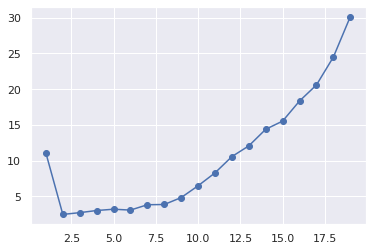

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

N_test = 1000
N_train = 20
x_test = np.linspace(-5.0, 5.0, N_test)
y_test = x_test**2 + 0.1 * np.random.randn(N_test)
idx = np.random.choice(N_test, N_train, replace=False)
x_train = x_test[idx]
y_train = y_test[idx]

def losses(x,y):
  loss = []
  coeffs = []
  n = range(1,20)
  for order in n:
    poly_model = make_pipeline(PolynomialFeatures(order), LinearRegression())
    poly_model.fit(x_train[:, np.newaxis], y_train)
    yfit = poly_model.predict(x_test[:, np.newaxis])
    sum_squares = np.sum((y_test - yfit)**2)
    loss.append(sum_squares)
    b = poly_model[1].coef_
    b = b.tolist() + [0.0] * (20 - order)
    coeffs.append(b)
  return [n, np.array(loss), np.array(coeffs)]

(x_out, y_out, coeffs) = losses(x, y)
plt.plot(x_out, np.log(y_out), '-o')

# Pretty print data from vectorizer
%load_ext google.colab.data_table
import pandas as pd
pd.DataFrame(np.hstack([y_out[:, np.newaxis], coeffs]), columns=['losses'] + ['w' + str(i) for i in range(21)])

#$sin$ regression and Taylor series

Suupose you sampled $sin$ function

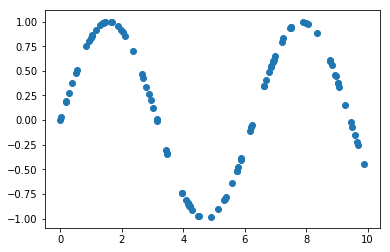

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

rng = np.random.RandomState(1)
N=100
x = 10 * rng.rand(N)
y = np.sin(x)
plt.scatter(x, y)

You can approximate $sin$ with the polynomial.

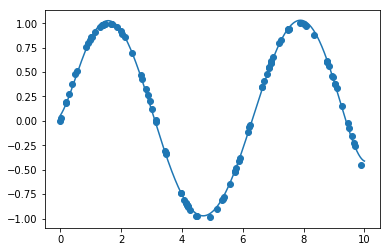

In [ ]:
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);



Its coefficients are

In [ ]:
coeffs = poly_model[1].coef_
print(coeffs)

[ 0.00000000e+00  4.76502622e-01  9.43383248e-01 -8.31361918e-01
  2.19572167e-01 -2.48601913e-02  1.20814081e-03 -1.86051194e-05]


Taylor expansion
$$
sin(x)=x-\frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!}+\cdots \approx x-0.167\, x^3+0.0083\, x^5+0.000198 \, x^7.
$$

The coefficients do not look alike the coefficients we obtained.

1) Maybe we got not enough points? Explore.


2) Our polynomic expansion contains $x$s with even powers while $sin$ Taylor series has only odd powers of $x$. Maybe we could use Lasso regression to eliminate even powers and fix coefficients in front of the odd powers? Explore.

3) The sine function can be expanded at different points. What about using some other point? Explore.